**<h1>PROJECT TITLE : A NOVEL APPROACH TO DIAGNOSE CHRONIC KIDNEY DISEASE USING ML ALGORITHMS</h1>**


**Data Description:**
We use the following representation to collect the dataset

1 age - age

2 bp - blood pressure

3 sg - specific gravity

4 al - albumin

5 su - sugar

6 rbc - red blood cells

7 pc - pus cell

8 pcc - pus cell clumps

9 ba - bacteria

10 bgr - blood glucose random

11 bu - blood urea

12 sc - serum creatinine

13 sod - sodium

14 pot - potassium

15 hemo - hemoglobin

16 pcv - packed cell volume

17 wc - white blood cell count

18 rc - red blood cell count

19 htn - hypertension

20 dm - diabetes mellitus

21 cad - coronary artery disease

22 appet - appetite

23 pe - pedal edema

24 ane - anemia

25 class - class

**Feature description**

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

<h3>Importing Libraries</h3>

In [1]:
#importing python libraries for analysis:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

**DataSet:**

Dataset is available on Kaggle.
Link: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease.

It contains measures of 24 features for 400 people.
14 features-Numerical, 10-Categorical.

In [2]:
df = pd.read_csv("/content/kidney_disease.csv")

In [3]:
df.head().T

0           1           2           3           4
id                       0           1           2           3           4
age                     48           7          62          48          51
bp                      80          50          80          70          80
sg                    1.02        1.02        1.01       1.005        1.01
al                       1           4           2           4           2
su                       0           0           3           0           0
rbc                    NaN         NaN      normal      normal      normal
pc                  normal      normal      normal    abnormal      normal
pcc             notpresent  notpresent  notpresent     present  notpresent
ba              notpresent  notpresent  notpresent  notpresent  notpresent
bgr                    121         NaN         423         117         106
bu                      36          18          53          56          26
sc                     1.2         0.8         1.8         3.8         1.4
sod                    NaN         NaN         NaN         111         NaN
pot                    NaN         NaN         NaN         2.5         NaN
hemo                  15.4        11.3         9.6        11.2        11.6
pcv                     44          38          31          32          35
wc                    7800        6000        7500        6700        7300
rc                     5.2         NaN         NaN         3.9         4.6
htn                    yes          no          no         yes          no
dm                     yes          no         yes          no          no
cad                     no          no          no          no          no
appet                 good        good        poor        poor        good
pe                      no          no          no         yes          no
ane                     no          no         yes         yes          no
classification         ckd         ckd         ckd         ckd         ckd

In [4]:
df.tail().T

395         396         397         398         399
id                     395         396         397         398         399
age                     55          42          12          17          58
bp                      80          70          80          60          80
sg                    1.02       1.025        1.02       1.025       1.025
al                       0           0           0           0           0
su                       0           0           0           0           0
rbc                 normal      normal      normal      normal      normal
pc                  normal      normal      normal      normal      normal
pcc             notpresent  notpresent  notpresent  notpresent  notpresent
ba              notpresent  notpresent  notpresent  notpresent  notpresent
bgr                    140          75         100         114         131
bu                      49          31          26          50          18
sc                     0.5         1.2         0.6           1         1.1
sod                    150         141         137         135         141
pot                    4.9         3.5         4.4         4.9         3.5
hemo                  15.7        16.5        15.8        14.2        15.8
pcv                     47          54          49          51          53
wc                    6700        7800        6600        7200        6800
rc                     4.9         6.2         5.4         5.9         6.1
htn                     no          no          no          no          no
dm                      no          no          no          no          no
cad                     no          no          no          no          no
appet                 good        good        good        good        good
pe                      no          no          no          no          no
ane                     no          no          no          no          no
classification      notckd      notckd      notckd      notckd      notckd

In [5]:
df.shape

(400, 26)

In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
List = list(df.columns)
print(List)

['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [8]:
List.sort()
print(List)

['age', 'al', 'ane', 'appet', 'ba', 'bgr', 'bp', 'bu', 'cad', 'classification', 'dm', 'hemo', 'htn', 'id', 'pc', 'pcc', 'pcv', 'pe', 'pot', 'rbc', 'rc', 'sc', 'sg', 'sod', 'su', 'wc']


In [9]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame
df.describe()

id     age      bp      sg      al      su     bgr      bu      sc  \
count 400.000 391.000 388.000 353.000 354.000 351.000 356.000 381.000 383.000   
mean  199.500  51.483  76.469   1.017   1.017   0.450 148.037  57.426   3.072   
std   115.614  17.170  13.684   0.006   1.353   1.099  79.282  50.503   5.741   
min     0.000   2.000  50.000   1.005   0.000   0.000  22.000   1.500   0.400   
25%    99.750  42.000  70.000   1.010   0.000   0.000  99.000  27.000   0.900   
50%   199.500  55.000  80.000   1.020   0.000   0.000 121.000  42.000   1.300   
75%   299.250  64.500  80.000   1.020   2.000   0.000 163.000  66.000   2.800   
max   399.000  90.000 180.000   1.025   5.000   5.000 490.000 391.000  76.000   

          sod     pot    hemo  
count 313.000 312.000 348.000  
mean  137.529   4.627  12.526  
std    10.409   3.194   2.913  
min     4.500   2.500   3.100  
25%   135.000   3.800  10.300  
50%   138.000   4.400  12.650  
75%   142.000   4.900  15.000  
max   163.000  47.000  17.800

**Exploratory Data Analysis(EDA)**

In [12]:
# Finding the no.of missing values in each column
Missing_Value = df.isnull().sum().sort_values(ascending=False)

In [13]:
Missing_Value

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
id                  0
dtype: int64

In [14]:
Missing_Value_PCT = df.isnull().mean().sort_values(ascending=False)*100

In [15]:
Missing_Values_df = pd.DataFrame({
    "Features" : Missing_Value.index,
    "No.of Missing_Value" : Missing_Value.values,
    "Percentages of Missing_Value" : Missing_Value_PCT.values
})
Missing_Values_df

Features  No.of Missing_Value  Percentages of Missing_Value
0              rbc                  152                        38.000
1               rc                  130                        32.500
2               wc                  105                        26.250
3              pot                   88                        22.000
4              sod                   87                        21.750
5              pcv                   70                        17.500
6               pc                   65                        16.250
7             hemo                   52                        13.000
8               su                   49                        12.250
9               sg                   47                        11.750
10              al                   46                        11.500
11             bgr                   44                        11.000
12              bu                   19                         4.750
13              sc                   17                         4.250
14              bp                   12                         3.000
15             age                    9                         2.250
16              ba                    4                         1.000
17             pcc                    4                         1.000
18             htn                    2                         0.500
19              dm                    2                         0.500
20             cad                    2                         0.500
21             ane                    1                         0.250
22           appet                    1                         0.250
23              pe                    1                         0.250
24  classification                    0                         0.000
25              id                    0                         0.000

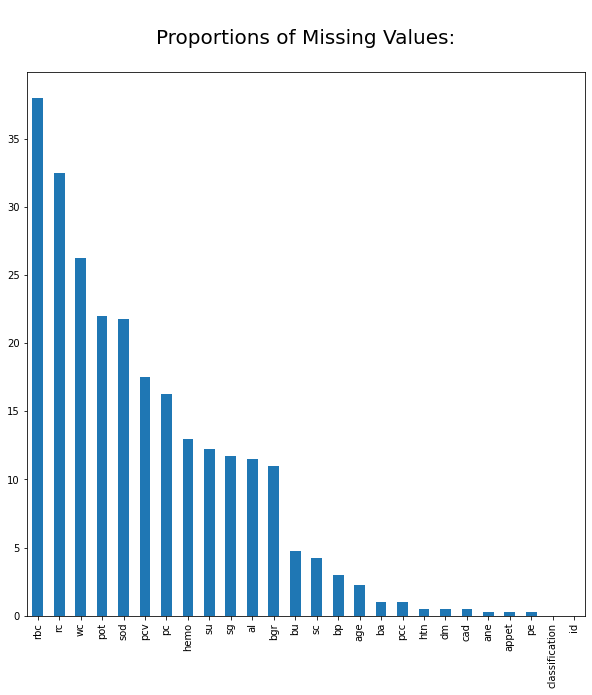

In [16]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False).plot(kind='bar', figsize=(10,10))
plt.title("\nProportions of Missing Values:\n",fontsize=20)
plt.show()

**<h2>Checking for Unique values and categorical features</h2>**

In [17]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

id : 400 values
age : 76 values
bp : 10 values
sg : 5 values
al : 6 values
su : 6 values
rbc : 2 values
pc : 2 values
pcc : 2 values
ba : 2 values
bgr : 146 values
bu : 118 values
sc : 84 values
sod : 34 values
pot : 40 values
hemo : 115 values
pcv : 44 values
wc : 92 values
rc : 49 values
htn : 2 values
dm : 5 values
cad : 3 values
appet : 2 values
pe : 2 values
ane : 2 values
classification : 3 values


In [18]:
for i in range(df.shape[0]):
    if df.iloc[i,25]=='ckd\t':
        df.iloc[i,25]='ckd'
    if df.iloc[i,20] in [' yes','\tyes']:
        df.iloc[i,20]='yes'
    if df.iloc[i,20]=='\tno':
        df.iloc[i,20]='no'
    if df.iloc[i,21]=='\tno':
        df.iloc[i,21]='no'
    if df.iloc[i,16]=='\t?':
        df.iloc[i,16]=np.nan
    if df.iloc[i,16]=='\t43':
        df.iloc[i,16]='43'
    if df.iloc[i,17]=='\t?':
        df.iloc[i,17]=np.nan
    if df.iloc[i,17]=='\t6200':
        df.iloc[i,17]= '6200'
    if df.iloc[i,17]=='\t8400':
        df.iloc[i,17]= '6200'
    if df.iloc[i,18]=='\t?':
        df.iloc[i,18]=np.nan
    if df.iloc[i,25]=='ckd':
        df.iloc[i,25]='yes'
    if df.iloc[i,25]=='notckd':
        df.iloc[i,25]='no'

There are some columns which are numeric but their values are given in the form of strings.

Converting those into numericals.

In [19]:
incorrect_type=['pcv','wc','rc']
numeric=[]
for i in df.columns:
    if df[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+incorrect_type

In [20]:
for col in incorrect_type:
        df[col]=df[col].astype('float')

In [21]:
print("Packed Cell Volume\n")
print(df['pcv'].unique())
print("White Blood Cells\n")
print(df['wc'].unique())
print("Red Blood Cells\n")
print(df['rc'].unique())

Packed Cell Volume

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
White Blood Cells

[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
Red Blood Cells

[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.

In [22]:
data_num = df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
data_cat = df[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

In [23]:
data_num

age     bp    sg    al    su     bgr     bu    sc     sod   pot   hemo  \
0   48.000 80.000 1.020 1.000 0.000 121.000 36.000 1.200     nan   nan 15.400   
1    7.000 50.000 1.020 4.000 0.000     nan 18.000 0.800     nan   nan 11.300   
2   62.000 80.000 1.010 2.000 3.000 423.000 53.000 1.800     nan   nan  9.600   
3   48.000 70.000 1.005 4.000 0.000 117.000 56.000 3.800 111.000 2.500 11.200   
4   51.000 80.000 1.010 2.000 0.000 106.000 26.000 1.400     nan   nan 11.600   
..     ...    ...   ...   ...   ...     ...    ...   ...     ...   ...    ...   
395 55.000 80.000 1.020 0.000 0.000 140.000 49.000 0.500 150.000 4.900 15.700   
396 42.000 70.000 1.025 0.000 0.000  75.000 31.000 1.200 141.000 3.500 16.500   
397 12.000 80.000 1.020 0.000 0.000 100.000 26.000 0.600 137.000 4.400 15.800   
398 17.000 60.000 1.025 0.000 0.000 114.000 50.000 1.000 135.000 4.900 14.200   
399 58.000 80.000 1.025 0.000 0.000 131.000 18.000 1.100 141.000 3.500 15.800   

       pcv       wc    rc  
0   44.000 7800.000 5.200  
1   38.000 6000.000   nan  
2   31.000 7500.000   nan  
3   32.000 6700.000 3.900  
4   35.000 7300.000 4.600  
..     ...      ...   ...  
395 47.000 6700.000 4.900  
396 54.000 7800.000 6.200  
397 49.000 6600.000 5.400  
398 51.000 7200.000 5.900  
399 53.000 6800.000 6.100  

[400 rows x 14 columns]

In [24]:
data_cat

rbc        pc         pcc          ba  htn   dm cad appet   pe  ane
0       NaN    normal  notpresent  notpresent  yes  yes  no  good   no   no
1       NaN    normal  notpresent  notpresent   no   no  no  good   no   no
2    normal    normal  notpresent  notpresent   no  yes  no  poor   no  yes
3    normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes
4    normal    normal  notpresent  notpresent   no   no  no  good   no   no
..      ...       ...         ...         ...  ...  ...  ..   ...  ...  ...
395  normal    normal  notpresent  notpresent   no   no  no  good   no   no
396  normal    normal  notpresent  notpresent   no   no  no  good   no   no
397  normal    normal  notpresent  notpresent   no   no  no  good   no   no
398  normal    normal  notpresent  notpresent   no   no  no  good   no   no
399  normal    normal  notpresent  notpresent   no   no  no  good   no   no

[400 rows x 10 columns]

In [25]:
#df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

Drop the id column because it won't help us to find any insights from the data.

In [26]:
df.drop('id',axis=1,inplace=True)
df.head().T

0           1           2           3           4
age                 48.000       7.000      62.000      48.000      51.000
bp                  80.000      50.000      80.000      70.000      80.000
sg                   1.020       1.020       1.010       1.005       1.010
al                   1.000       4.000       2.000       4.000       2.000
su                   0.000       0.000       3.000       0.000       0.000
rbc                    NaN         NaN      normal      normal      normal
pc                  normal      normal      normal    abnormal      normal
pcc             notpresent  notpresent  notpresent     present  notpresent
ba              notpresent  notpresent  notpresent  notpresent  notpresent
bgr                121.000         NaN     423.000     117.000     106.000
bu                  36.000      18.000      53.000      56.000      26.000
sc                   1.200       0.800       1.800       3.800       1.400
sod                    NaN         NaN         NaN     111.000         NaN
pot                    NaN         NaN         NaN       2.500         NaN
hemo                15.400      11.300       9.600      11.200      11.600
pcv                 44.000      38.000      31.000      32.000      35.000
wc                7800.000    6000.000    7500.000    6700.000    7300.000
rc                   5.200         NaN         NaN       3.900       4.600
htn                    yes          no          no         yes          no
dm                     yes          no         yes          no          no
cad                     no          no          no          no          no
appet                 good        good        poor        poor        good
pe                      no          no          no         yes          no
ane                     no          no         yes         yes          no
classification         yes         yes         yes         yes         yes

In [27]:
for i in data_cat:
    print(f'{i} has {df[i].unique()} categories.\n')

rbc has [nan 'normal' 'abnormal'] categories.

pc has ['normal' 'abnormal' nan] categories.

pcc has ['notpresent' 'present' nan] categories.

ba has ['notpresent' 'present' nan] categories.

htn has ['yes' 'no' nan] categories.

dm has ['yes' 'no' nan] categories.

cad has ['no' 'yes' nan] categories.

appet has ['good' 'poor' nan] categories.

pe has ['no' 'yes' nan] categories.

ane has ['no' 'yes' nan] categories.



1) For numeric data
   
   histograms to understand distributions

   Correlation plot

   Pivot table to compare survival rate across numeric variables

2) For Categorical Data

   Bar charts to understand classes blance

   Pivot tables to understand relationship with survival

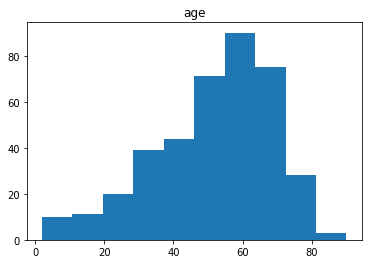

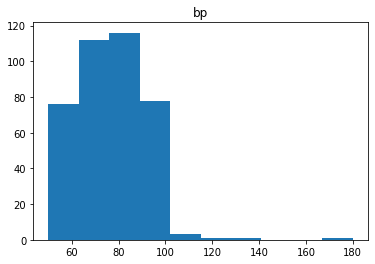

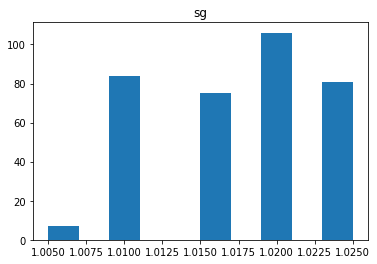

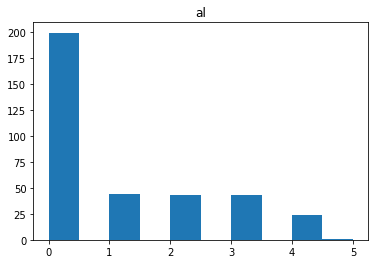

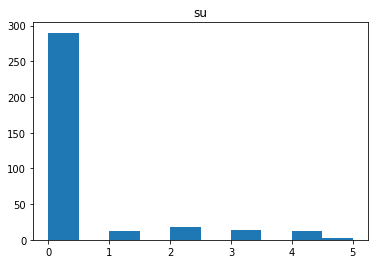

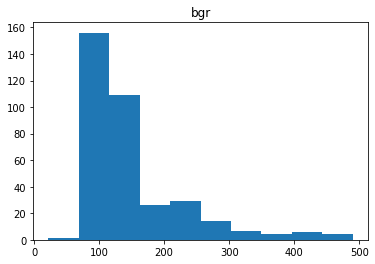

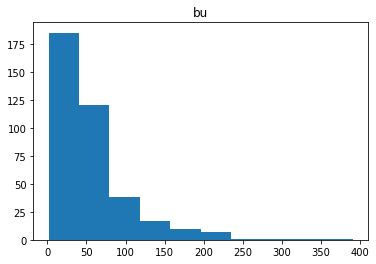

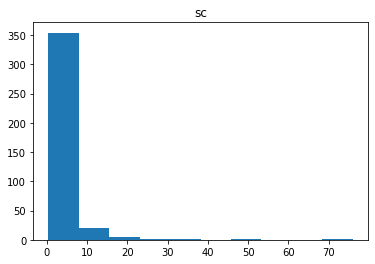

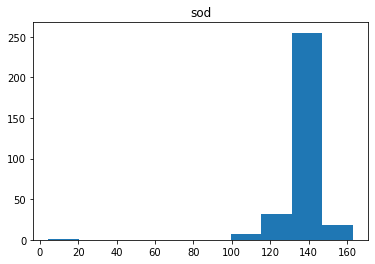

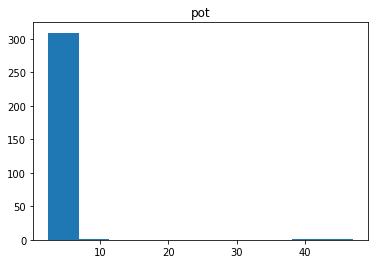

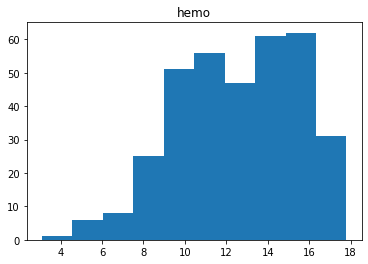

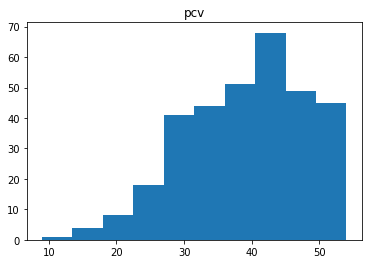

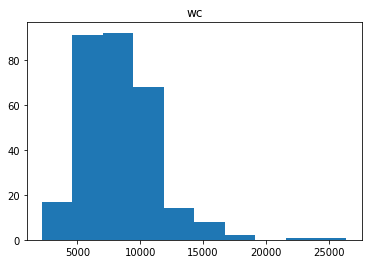

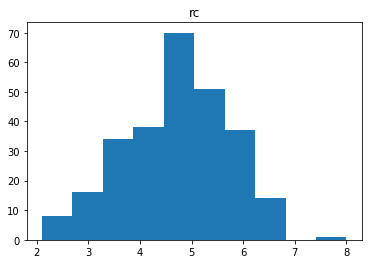

In [28]:
for i in data_num.columns:
    plt.hist(data_num[i])
    plt.title(i)
    plt.show()

In [29]:
pd.pivot_table(df, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo'])

age    al     bgr     bp     bu   hemo   pot    sc    sg  \
classification                                                               
no             46.517 0.000 107.722 71.351 32.799 15.188 4.338 0.869 1.022   
yes            54.541 1.722 175.420 79.625 72.389 10.648 4.878 4.415 1.014   

                   sod    su  
classification                
no             141.731 0.000  
yes            133.902 0.767

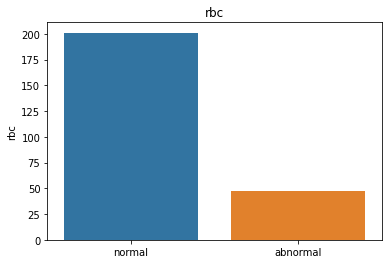

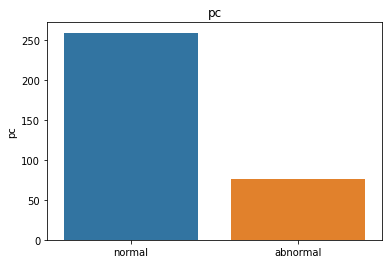

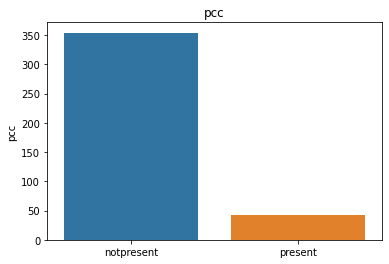

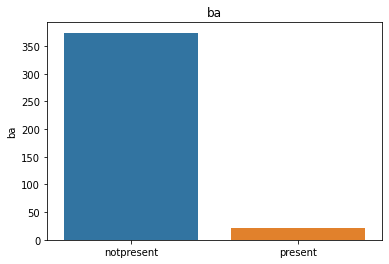

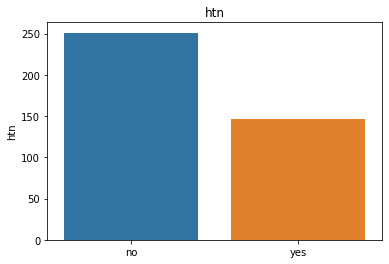

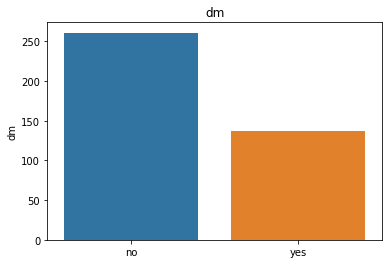

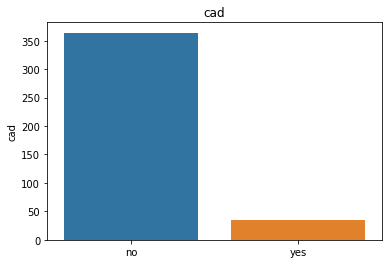

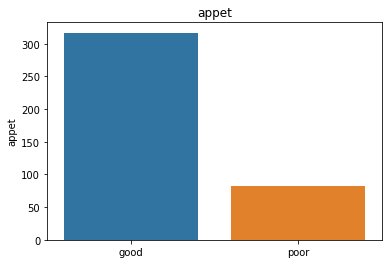

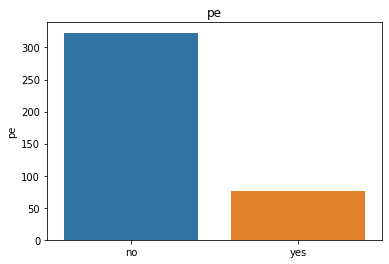

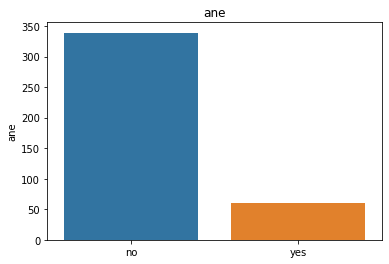

In [30]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [31]:
print(df.classification.value_counts())
df.classification.replace("ckd\t","ckd",inplace=True)
print(df.classification.value_counts())
print("==="*20)
print(df.dm.value_counts())
df.dm.replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
print(df.dm.value_counts())
print("==="*20)
print(df.cad.value_counts())
df.cad.replace(["\tno"],["no"],inplace=True)
print(df.cad.value_counts())

yes    250
no     150
Name: classification, dtype: int64
yes    250
no     150
Name: classification, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no     364
yes     34
Name: cad, dtype: int64
no     364
yes     34
Name: cad, dtype: int64


In [32]:
for i in data_cat:
    print(pd.pivot_table(df,index='classification',columns=i, values='age'))
    print("=="*20)

rbc             abnormal  normal
classification                  
no                   nan  46.057
yes               52.068  54.610
pc              abnormal  normal
classification                  
no                   nan  46.057
yes               55.149  52.374
pcc             notpresent  present
classification                     
no                  46.683      nan
yes                 53.530   59.357
ba              notpresent  present
classification                     
no                  46.683      nan
yes                 54.541   54.545
htn                no    yes
classification              
no             46.408    nan
yes            46.020 60.542
dm                 no    yes
classification              
no             46.408    nan
yes            47.541 60.278
cad                no    yes
classification              
no             46.408    nan
yes            52.923 64.441
appet            good   poor
classification              
no             46.324    nan
yes          

In [33]:
# Finding unique values of each feature in the dataset.
for i in df.columns:
    print("unique values in {}:\n".format(i),df[i].unique())

unique values in age:
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in bp:
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in sg:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in al:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in su:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in rbc:
 [nan 'normal' 'abnormal']
unique values in pc:
 ['normal' 'abnormal' nan]
unique values in pcc:
 ['notpresent' 'present' nan]
unique values in ba:
 ['notpresent' 'present' nan]
unique values in bgr:
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91.

**<h2>Feature Distribution</h2>**

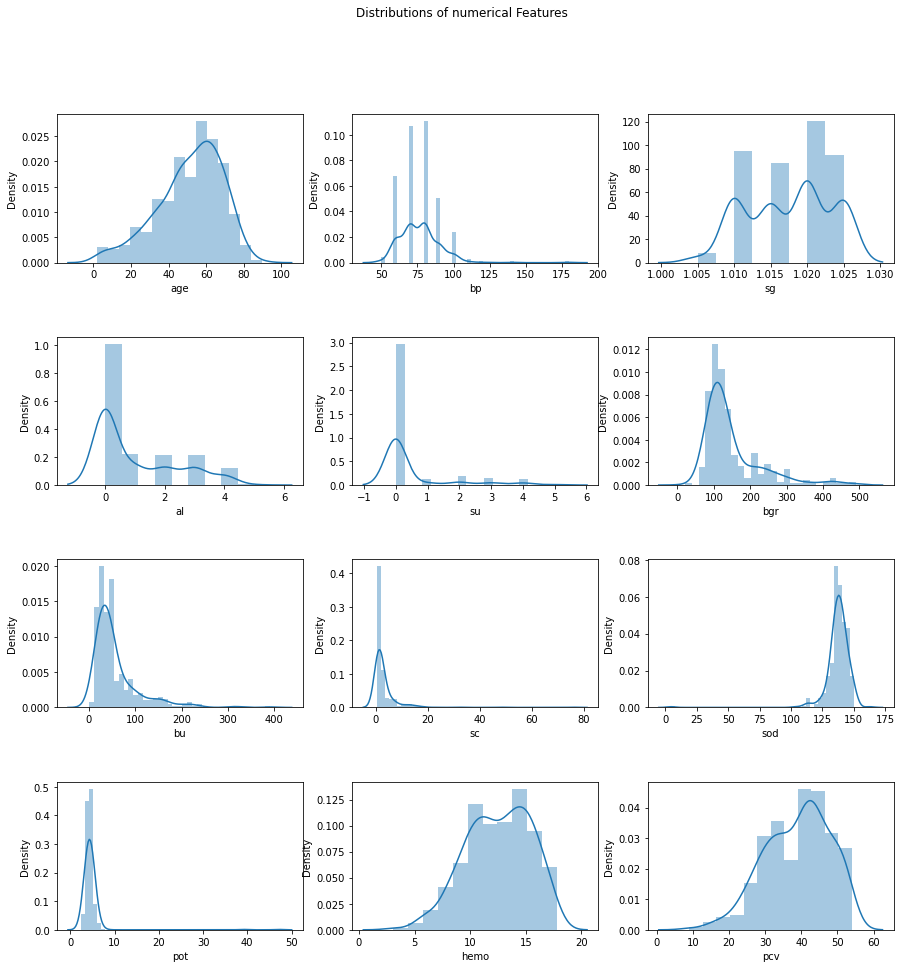

In [34]:
# Numerical Features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), data_num):
    sns.distplot(a=df[feats], ax=ax)

**Observations:**
1. age looks a bit left skewed
2. bgr is right skewed
3. bu is also a bit right skewed
4. Rest of the features are lightly skewed

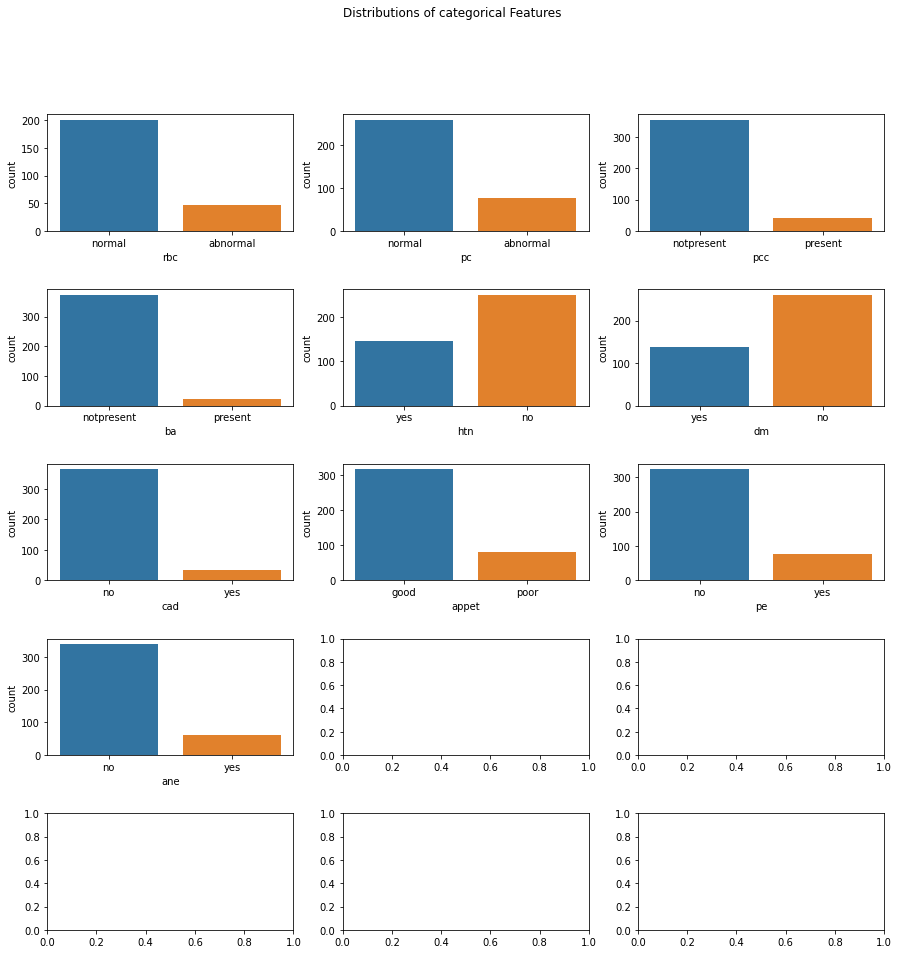

In [35]:
# categorical Features

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), data_cat):
    sns.countplot(df[feats], ax=ax)

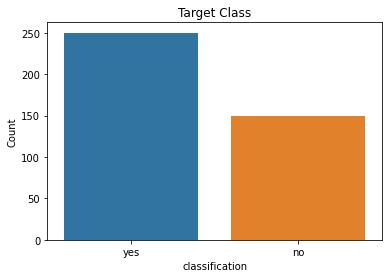

In [36]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("Target Class")
plt.show()

**<h2>Correlations</h2>**

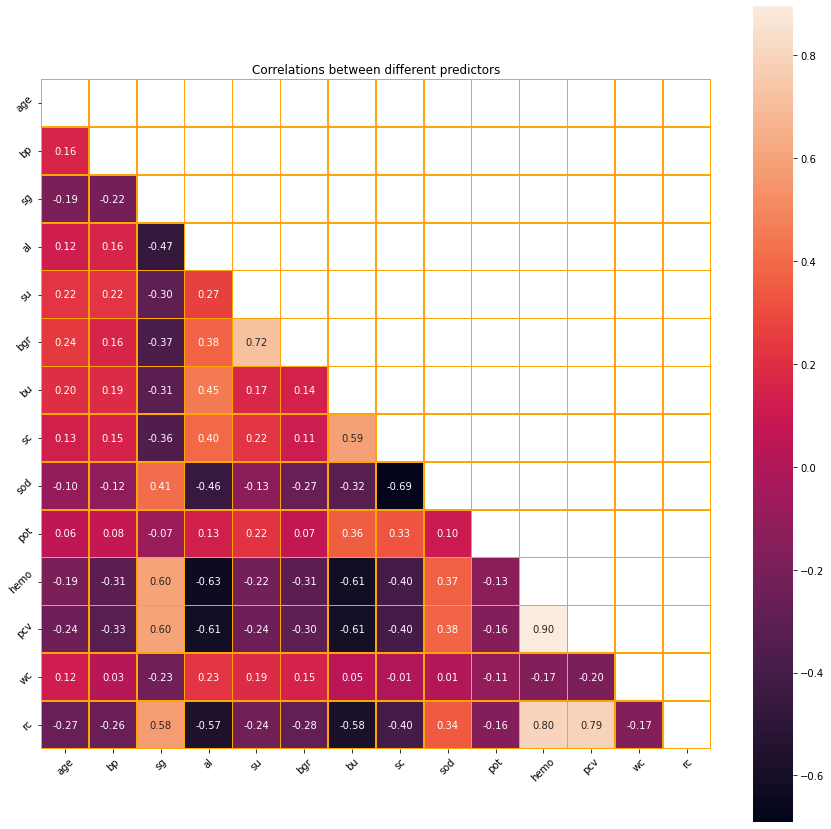

In [37]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

**Positive Correlation:**
1. Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
2. Sugar -> Blood glucose random
3. Blood Urea -> Serum creatinine
4. Hemoglobin -> Red Blood cell count <- packed cell volume

**Negative Correlation:**
1. Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
2. Serum creatinine -> Sodium

**Encoding**

*   KNN Imputation will be used.
*   However, we must first encode the categorical features.


*   One-Hot Encoding would be ideal in this situation because every categorical characteristic has only two values, implying that we will not be adding dimensions.


In [38]:
encod_one=pd.get_dummies(df,drop_first=True,prefix_sep=': ')
encod_one.head()

age     bp    sg    al    su     bgr     bu    sc     sod   pot   hemo  \
0 48.000 80.000 1.020 1.000 0.000 121.000 36.000 1.200     nan   nan 15.400   
1  7.000 50.000 1.020 4.000 0.000     nan 18.000 0.800     nan   nan 11.300   
2 62.000 80.000 1.010 2.000 3.000 423.000 53.000 1.800     nan   nan  9.600   
3 48.000 70.000 1.005 4.000 0.000 117.000 56.000 3.800 111.000 2.500 11.200   
4 51.000 80.000 1.010 2.000 0.000 106.000 26.000 1.400     nan   nan 11.600   

     pcv       wc    rc  rbc: normal  pc: normal  pcc: present  ba: present  \
0 44.000 7800.000 5.200            0           1             0            0   
1 38.000 6000.000   nan            0           1             0            0   
2 31.000 7500.000   nan            1           1             0            0   
3 32.000 6700.000 3.900            1           0             1            0   
4 35.000 7300.000 4.600            1           1             0            0   

   htn: yes  dm: yes  cad: yes  appet: poor  pe: yes  ane: yes  \
0         1        1         0            0        0         0   
1         0        0         0            0        0         0   
2         0        1         0            1        0         1   
3         1        0         0            1        1         1   
4         0        0         0            0        0         0   

   classification: yes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

All NaN (missing) values are equal to 0.
Convert them into NaNs.

In [39]:
names={}
for name in df.columns:
    for ohname in encod_one.columns:
        if name+': ' in ohname and name in data_cat:
            names[name]=ohname
            for i in range(400):
                if type(df.loc[i,name])!=str:
                    if math.isnan(df.loc[i,name]):
                        encod_one.loc[i,ohname]=df.loc[i,name]

In [40]:
test_oh=pd.DataFrame(columns=df.columns)
for col in test_oh.columns:
    if col in data_cat:
        test_oh[col]=encod_one[names[col]]
    elif col=='classification':
        test_oh[col]=encod_one['classification: yes']
    else:
        test_oh[col]=encod_one[col]

In [41]:
test_oh

age     bp    sg    al    su   rbc    pc   pcc    ba     bgr     bu  \
0   48.000 80.000 1.020 1.000 0.000   nan 1.000 0.000 0.000 121.000 36.000   
1    7.000 50.000 1.020 4.000 0.000   nan 1.000 0.000 0.000     nan 18.000   
2   62.000 80.000 1.010 2.000 3.000 1.000 1.000 0.000 0.000 423.000 53.000   
3   48.000 70.000 1.005 4.000 0.000 1.000 0.000 1.000 0.000 117.000 56.000   
4   51.000 80.000 1.010 2.000 0.000 1.000 1.000 0.000 0.000 106.000 26.000   
..     ...    ...   ...   ...   ...   ...   ...   ...   ...     ...    ...   
395 55.000 80.000 1.020 0.000 0.000 1.000 1.000 0.000 0.000 140.000 49.000   
396 42.000 70.000 1.025 0.000 0.000 1.000 1.000 0.000 0.000  75.000 31.000   
397 12.000 80.000 1.020 0.000 0.000 1.000 1.000 0.000 0.000 100.000 26.000   
398 17.000 60.000 1.025 0.000 0.000 1.000 1.000 0.000 0.000 114.000 50.000   
399 58.000 80.000 1.025 0.000 0.000 1.000 1.000 0.000 0.000 131.000 18.000   

       sc     sod   pot   hemo    pcv       wc    rc   htn    dm   cad  appet  \
0   1.200     nan   nan 15.400 44.000 7800.000 5.200 1.000 1.000 0.000  0.000   
1   0.800     nan   nan 11.300 38.000 6000.000   nan 0.000 0.000 0.000  0.000   
2   1.800     nan   nan  9.600 31.000 7500.000   nan 0.000 1.000 0.000  1.000   
3   3.800 111.000 2.500 11.200 32.000 6700.000 3.900 1.000 0.000 0.000  1.000   
4   1.400     nan   nan 11.600 35.000 7300.000 4.600 0.000 0.000 0.000  0.000   
..    ...     ...   ...    ...    ...      ...   ...   ...   ...   ...    ...   
395 0.500 150.000 4.900 15.700 47.000 6700.000 4.900 0.000 0.000 0.000  0.000   
396 1.200 141.000 3.500 16.500 54.000 7800.000 6.200 0.000 0.000 0.000  0.000   
397 0.600 137.000 4.400 15.800 49.000 6600.000 5.400 0.000 0.000 0.000  0.000   
398 1.000 135.000 4.900 14.200 51.000 7200.000 5.900 0.000 0.000 0.000  0.000   
399 1.100 141.000 3.500 15.800 53.000 6800.000 6.100 0.000 0.000 0.000  0.000   

       pe   ane  classification  
0   0.000 0.000               1  
1   0.000 0.000               1  
2   0.000 1.000               1  
3   1.000 1.000               1  
4   0.000 0.000               1  
..    ...   ...             ...  
395 0.000 0.000               0  
396 0.000 0.000               0  
397 0.000 0.000               0  
398 0.000 0.000               0  
399 0.000 0.000               0  

[400 rows x 25 columns]

In [42]:
((pd.isna(df)==pd.isna(test_oh))==False).sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

KNN measures distances, which means we have to make sure our features are on the same scale.

If they are not, then distances will depend mostly on features with a wider spread.

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

The Quantile Transformer transforms a distribution into a normal or uniform one. We'll be trying both.

The Power Transformer applies another non-linear transformation to make your data more normal-like.

StandardScaler standardizes your features.

RobustScaler centers data but, instead of dividing by the standard deviation, it divides by an inter-quantile range that can be specified.

You can either specify the inter-quantile range or just leave it to default.

In [44]:
# feature transformers to scale my data
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
NSPT=PowerTransformer(standardize=False) #I'll feed its output to a normalizer and see if that makes any difference.
SPT=PowerTransformer()
RS=RobustScaler() #default
WRS=RobustScaler(quantile_range=(15,85)) # a "wider" range
SS=StandardScaler()

Transformers=[NQT,UQT,NSPT,SPT,RS,WRS,SS]
MMS=MinMaxScaler()

Pipes=[] #they're not actually pipelines, except for one,
#but initially I was going to normalize all of them, and didn't bother to change the name later
for tr in Transformers:
    p=make_pipeline(tr)
    Pipes.append(p)
Pipes[2]=make_pipeline(NSPT,MMS)

In [45]:
for pipe in Pipes:
    print(pipe)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal'))])
Pipeline(steps=[('quantiletransformer', QuantileTransformer())])
Pipeline(steps=[('powertransformer', PowerTransformer(standardize=False)),
                ('minmaxscaler', MinMaxScaler())])
Pipeline(steps=[('powertransformer', PowerTransformer())])
Pipeline(steps=[('robustscaler', RobustScaler())])
Pipeline(steps=[('robustscaler', RobustScaler(quantile_range=(15, 85)))])
Pipeline(steps=[('standardscaler', StandardScaler())])


In [46]:
datarrays=[]
for pipe in Pipes:
    arr=pipe.fit_transform(encod_one)
    datarrays.append(arr)

dataframes=[encod_one]
for arr in datarrays:
    df1=pd.DataFrame(arr,columns=encod_one.columns)
    dataframes.append(df1)

In [47]:
categorical_feats=encod_one.columns[14:]
numerical_feats=encod_one.columns[:14]

In [48]:
categorical_feats

Index(['rbc: normal', 'pc: normal', 'pcc: present', 'ba: present', 'htn: yes',
       'dm: yes', 'cad: yes', 'appet: poor', 'pe: yes', 'ane: yes',
       'classification: yes'],
      dtype='object')

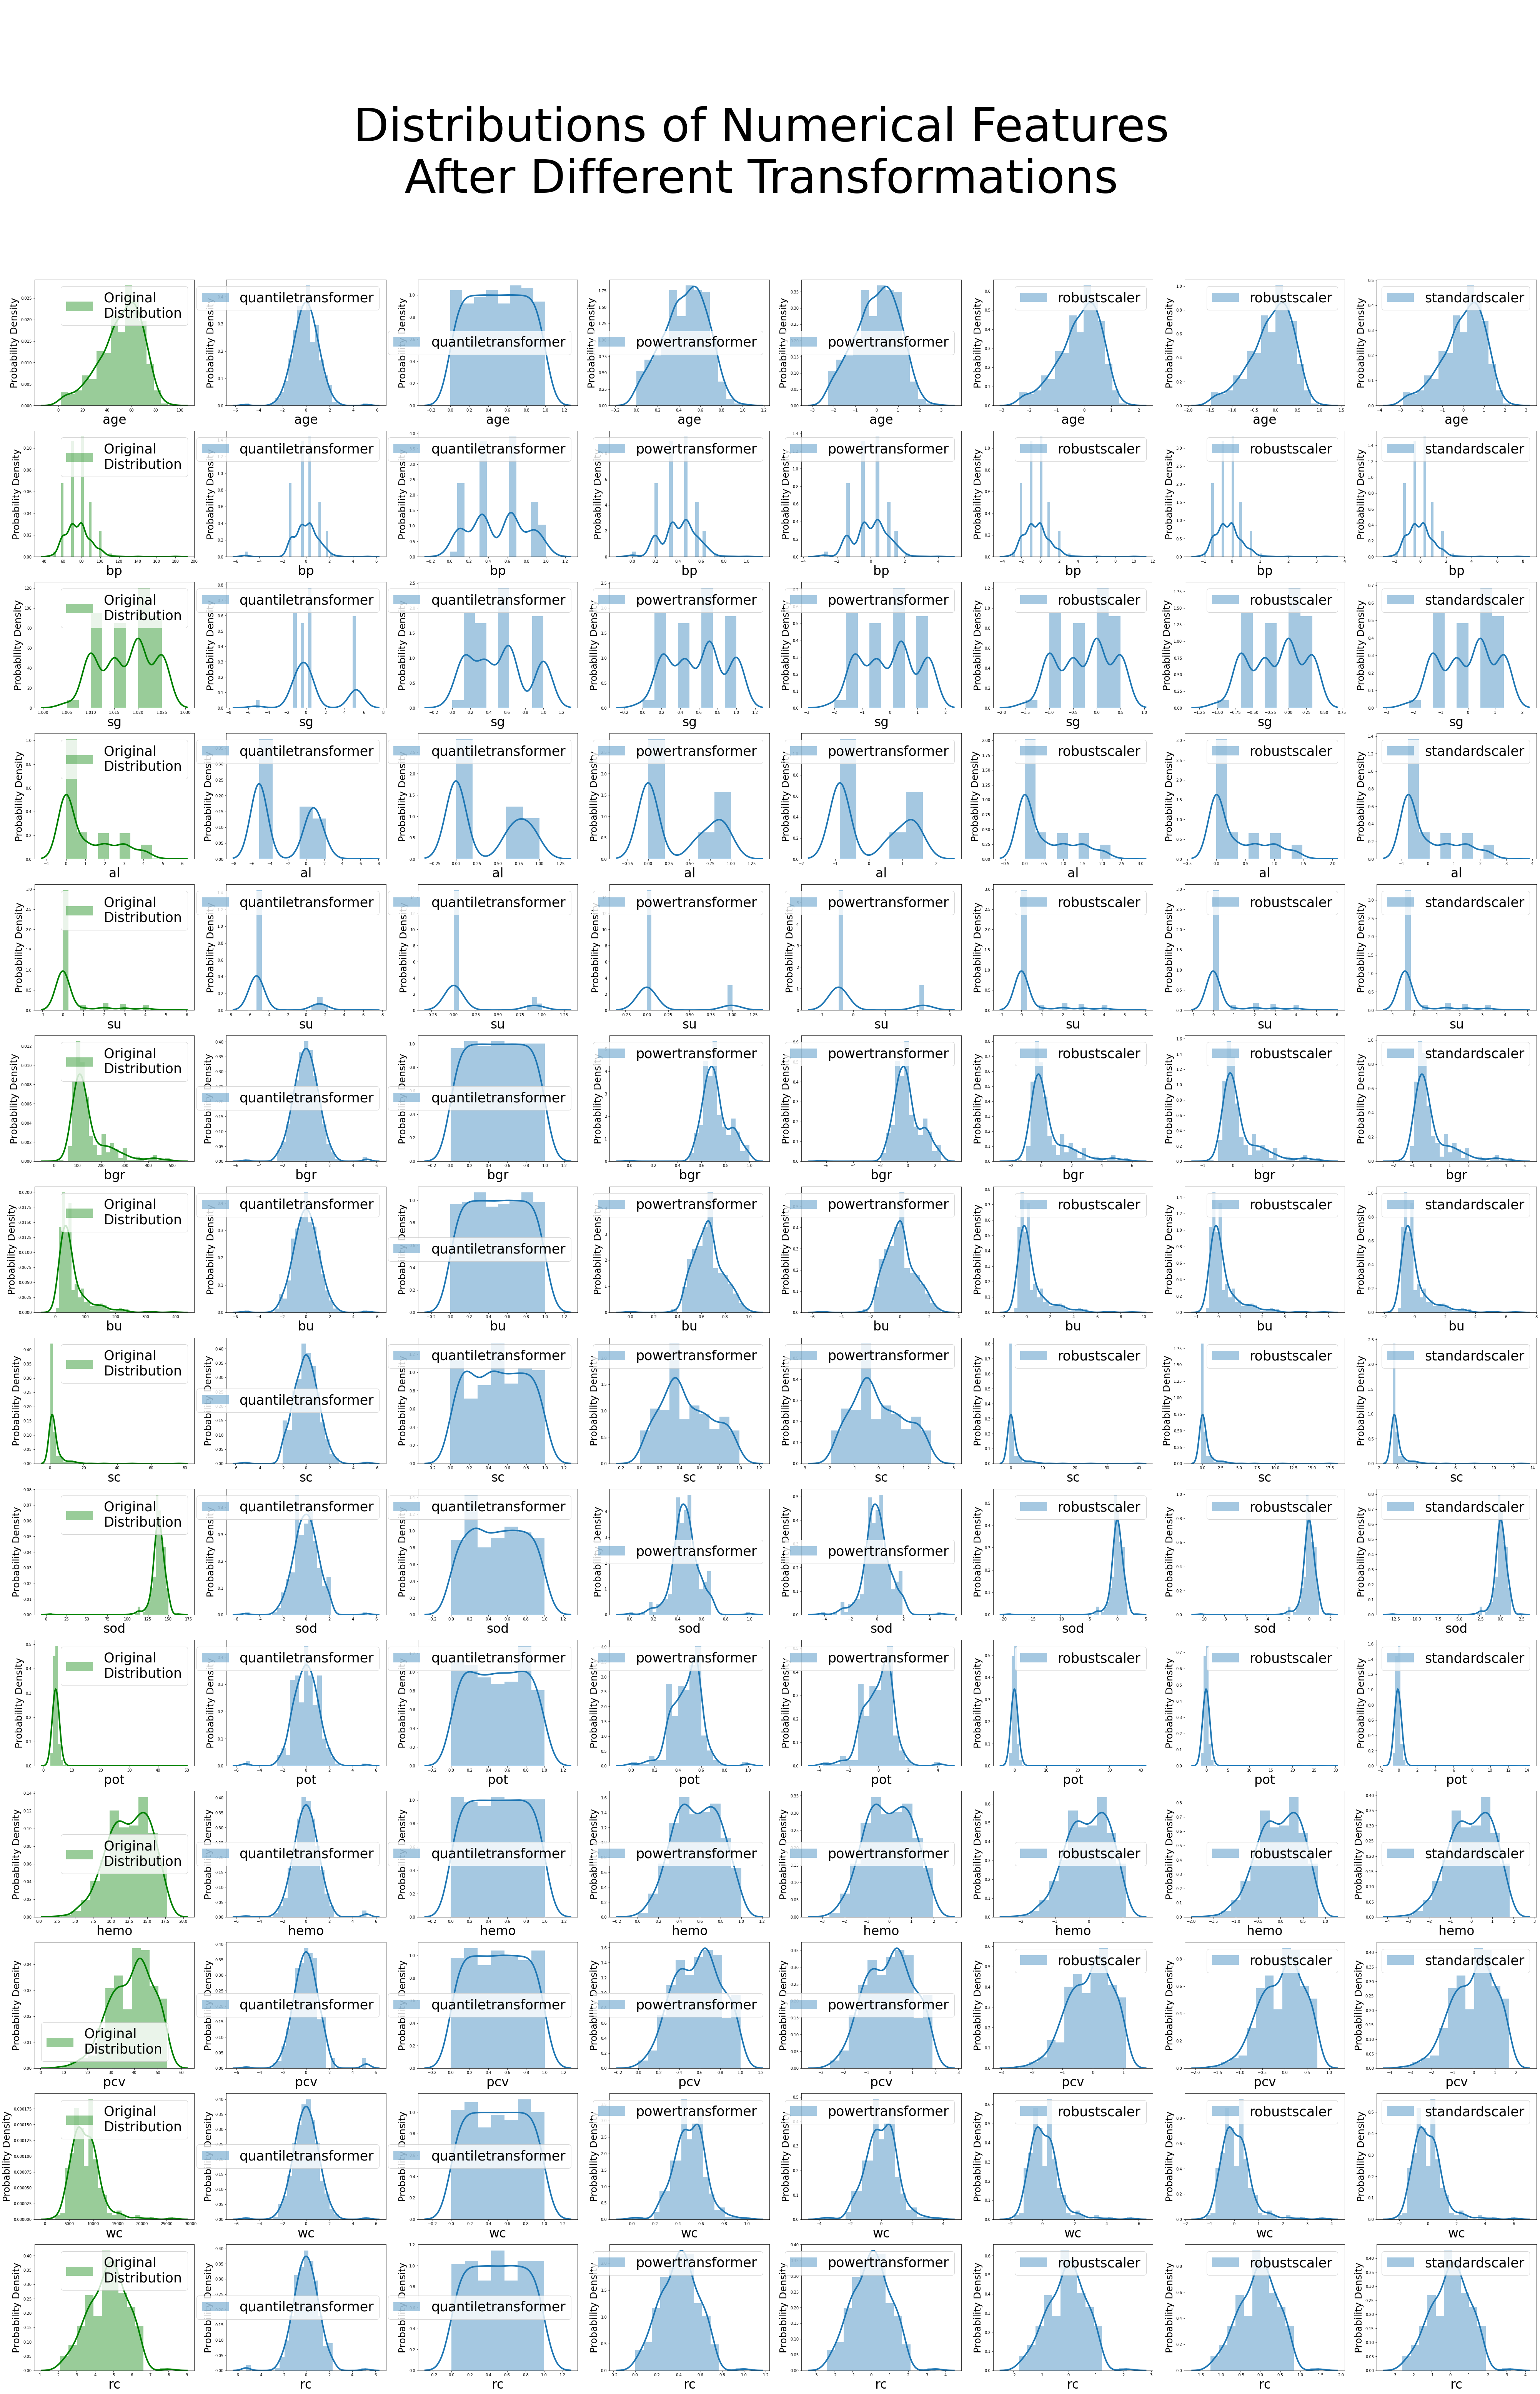

In [49]:
n_rows, n_cols = (14,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nDistributions of Numerical Features\nAfter Different Transformations', fontsize=120)
for i in range(14):
    fig = sns.distplot(encod_one.iloc[:,i], color="g", label='Original\nDistribution', norm_hist=True,
    
    ax=axes[i,0], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Probability Density",fontsize=25)

for j in range(1,8):
    for i in range(14):
        label=Pipes[j-1].steps[0][0]
        
        fig = sns.distplot(dataframes[j].iloc[:,i],
                           label=label, norm_hist=True,

        ax=axes[i,j], kde_kws={"lw":4})
        
        fig=fig.legend(loc='best', fontsize=35)
    
        axes[i,j].set_ylabel("Probability Density",fontsize=25)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)

plt.show()

Both quantile transformers performed well

The unstandardized, normalized powertransformer (orange) performed quite awfully.

The Standardized power transformer (purple) is quite decent.

Linear transformers have almost identical results. 

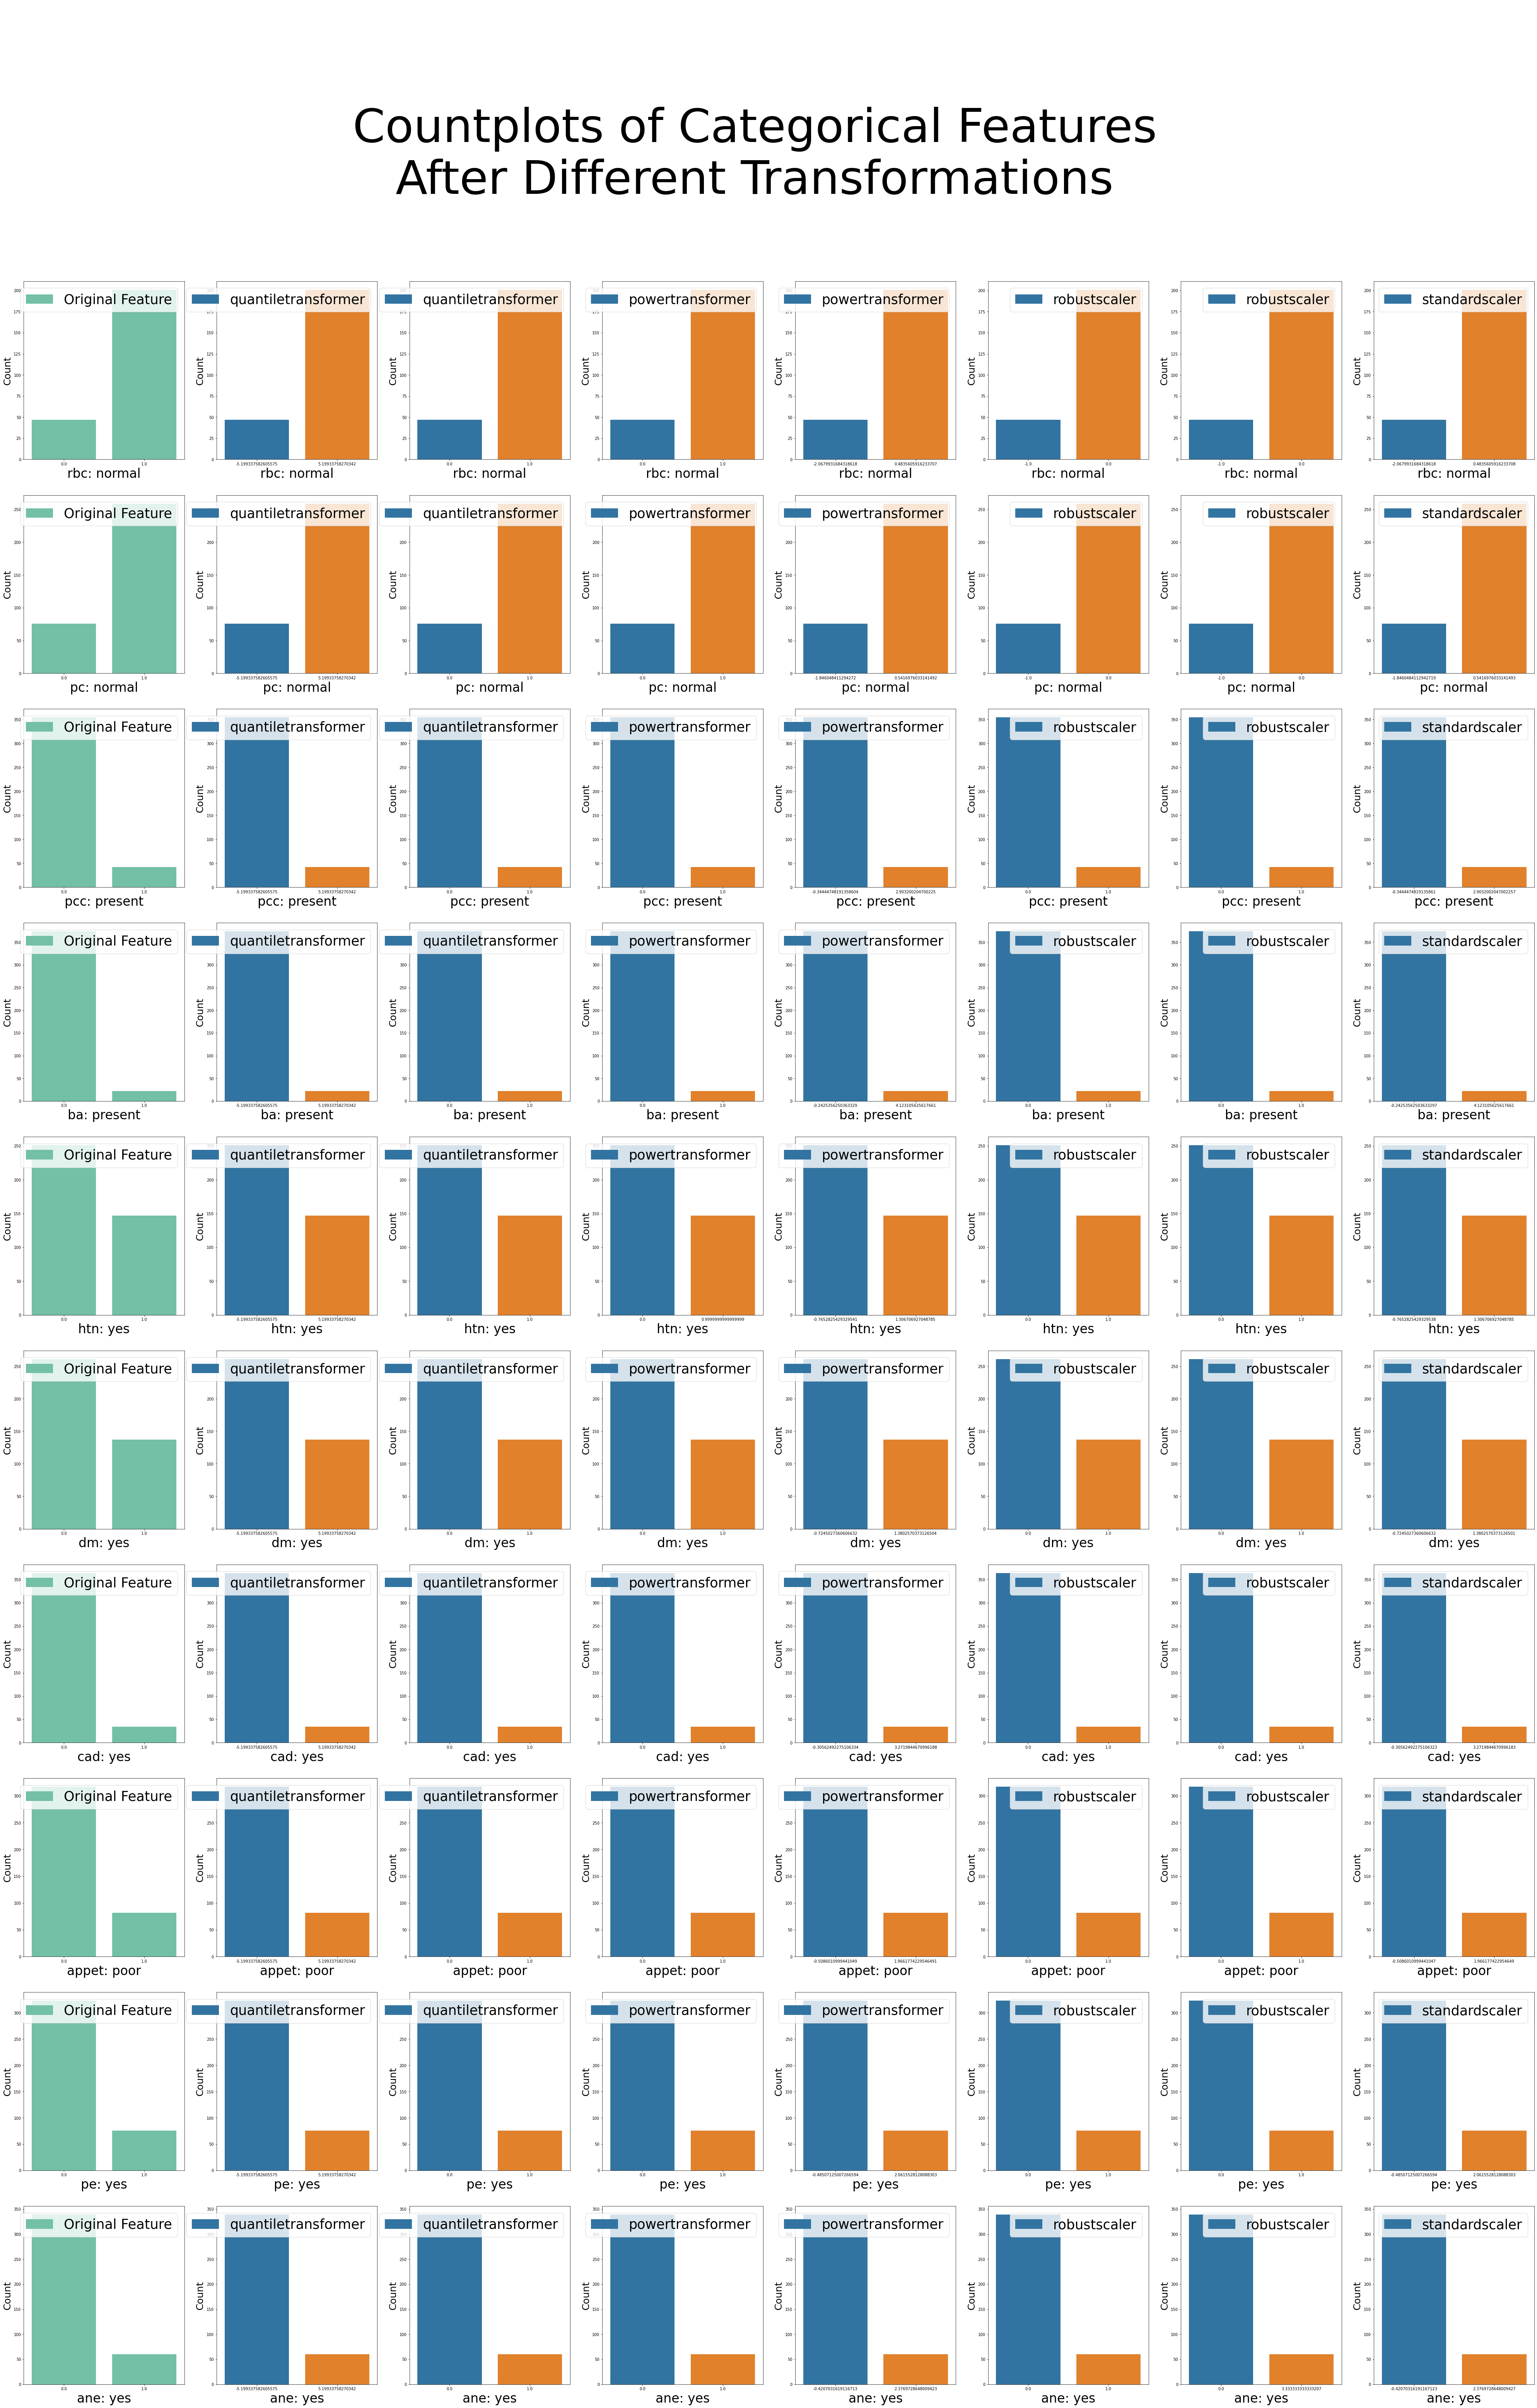

In [50]:
n_rows, n_cols = (10,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nCountplots of Categorical Features\nAfter Different Transformations', fontsize=120)
for i in range(10):
    g = sns.countplot(encod_one.iloc[:,i+14], color="mediumaquamarine", label="Original Feature",
    
    ax=axes[i,0])
    
    g=g.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Count",fontsize=25)

for j in range(1,8):
    for i in range(10):
        label=Pipes[j-1].steps[0][0]
        
        g = sns.countplot(dataframes[j].iloc[:,i+14], label=label,

        ax=axes[i,j])
        
        g=g.legend(loc='best', fontsize=35)
    
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
    
        axes[i,j].set_ylabel("Count",fontsize=25)

plt.show()

**Imputation**

In [51]:
from sklearn.impute import KNNImputer

knnimp=KNNImputer(weights='distance', n_neighbors=8)
x=[encod_one.to_numpy()]
for di in range(1,len(dataframes)):
    x.append(knnimp.fit_transform(dataframes[di]))
A=[x[0]]
for i in range(1,len(x)):
    A.append(Pipes[i-1].inverse_transform(x[i]))

In [52]:
imp=[]
for i in range(len(A)):
    imp.append(pd.DataFrame(A[i],columns=encod_one.columns))

In [53]:
imp[6].iloc[:,15].unique()

array([1.        , 0.        , 0.63160166, 0.88607326, 0.61387208,
       0.75862137, 0.70806966, 0.86137172, 0.63119148, 0.89543788,
       0.74179684, 0.77161848, 0.61793009, 0.82398101, 0.75406756,
       0.36706328, 0.5835219 , 0.74235729, 0.87901676, 0.64341621,
       0.36860117, 0.78812957, 0.45736785, 0.74810413, 0.73289946,
       0.88144675, 0.75573017, 0.51257409, 0.89459771, 0.2498657 ,
       0.89557894, 0.7636394 , 0.75378168, 0.89316823, 0.76532431,
       0.83814399, 0.5902046 , 0.88189939, 0.6411361 , 0.74195041,
       0.82964032, 0.86885068, 0.63890626, 0.48569735, 0.88566203,
       0.77744959, 0.63198161, 0.73726093, 0.61095653, 0.62328647,
       0.67830806, 0.71205989, 0.78204737, 0.40201877, 0.48129177])

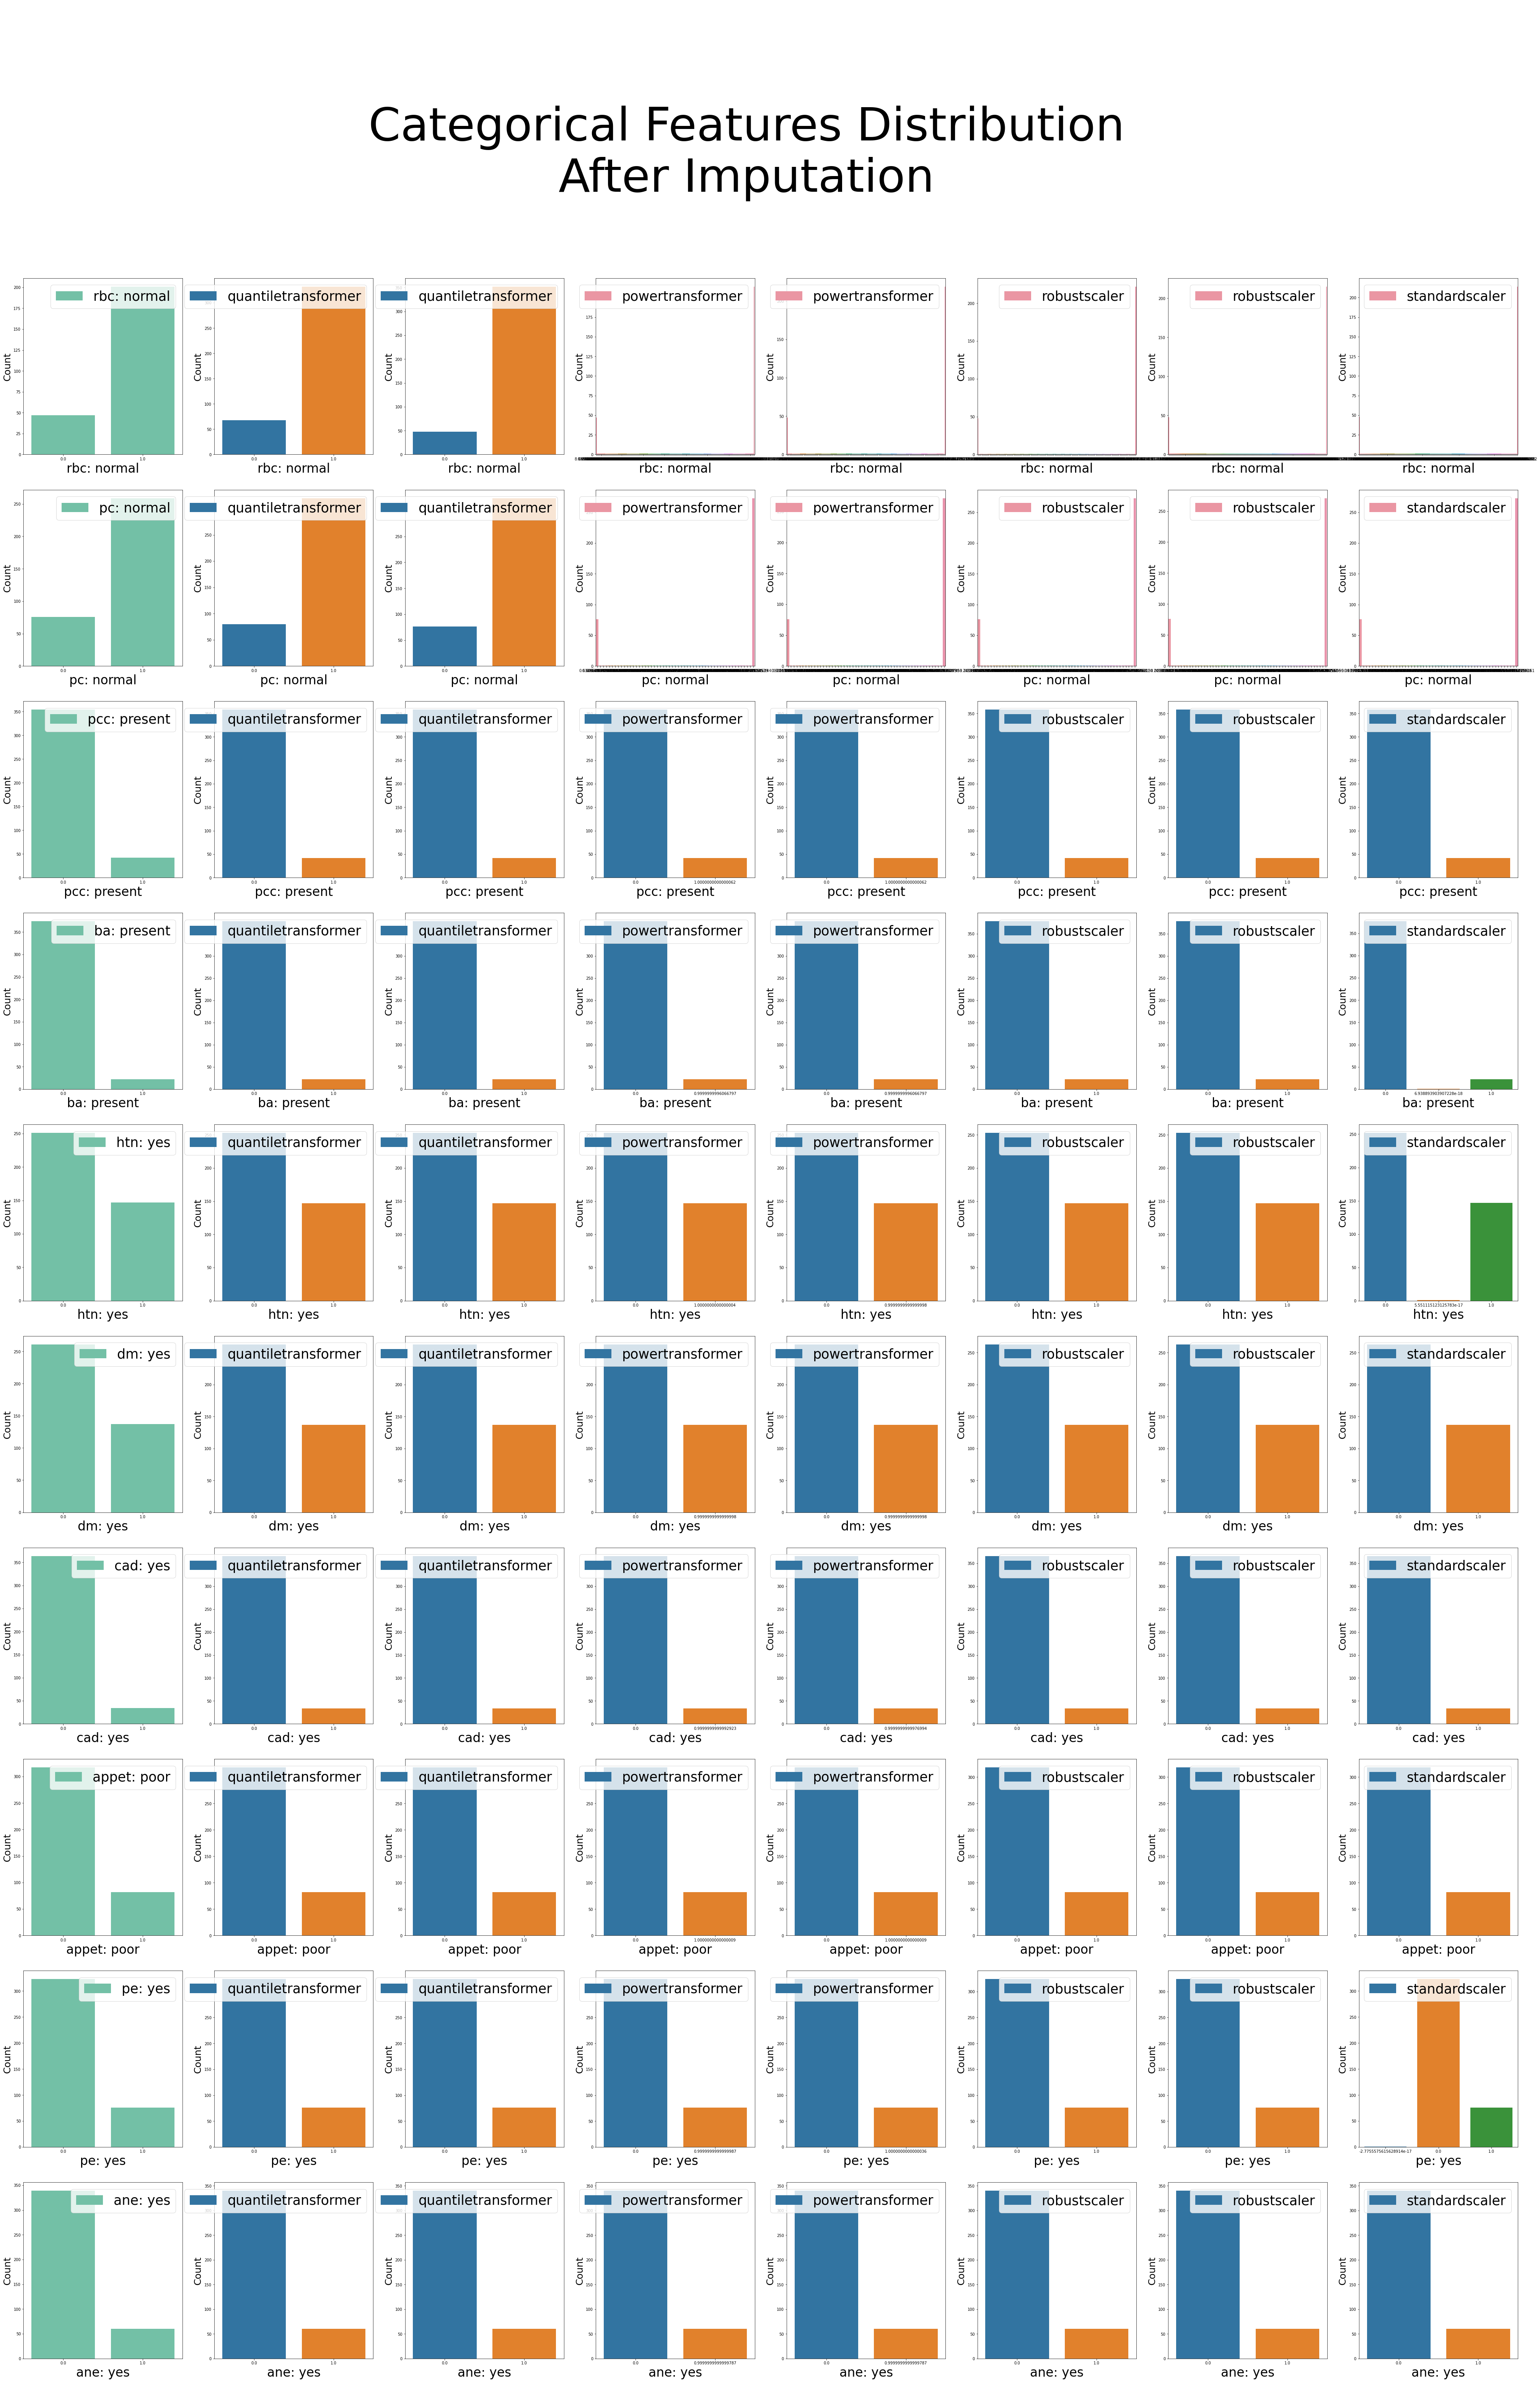

In [54]:
n_rows, n_cols = (10,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle("\n\nCategorical Features Distribution\nAfter Imputation", fontsize=120)
for i in range(10):
    g = sns.countplot(encod_one.iloc[:,i+14], color="mediumaquamarine", label=categorical_feats[i],
    
    ax=axes[i,0])
    
    g=g.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Count",fontsize=25)

for j in range(1,8):
    for i in range(10):
        label=Pipes[j-1].steps[0][0]
        
        g = sns.countplot(imp[j].iloc[:,i+14], label=label,

        ax=axes[i,j])
        
        g=g.legend(loc='best', fontsize=35)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)
    
        axes[i,j].set_ylabel("Count",fontsize=25)


plt.show()

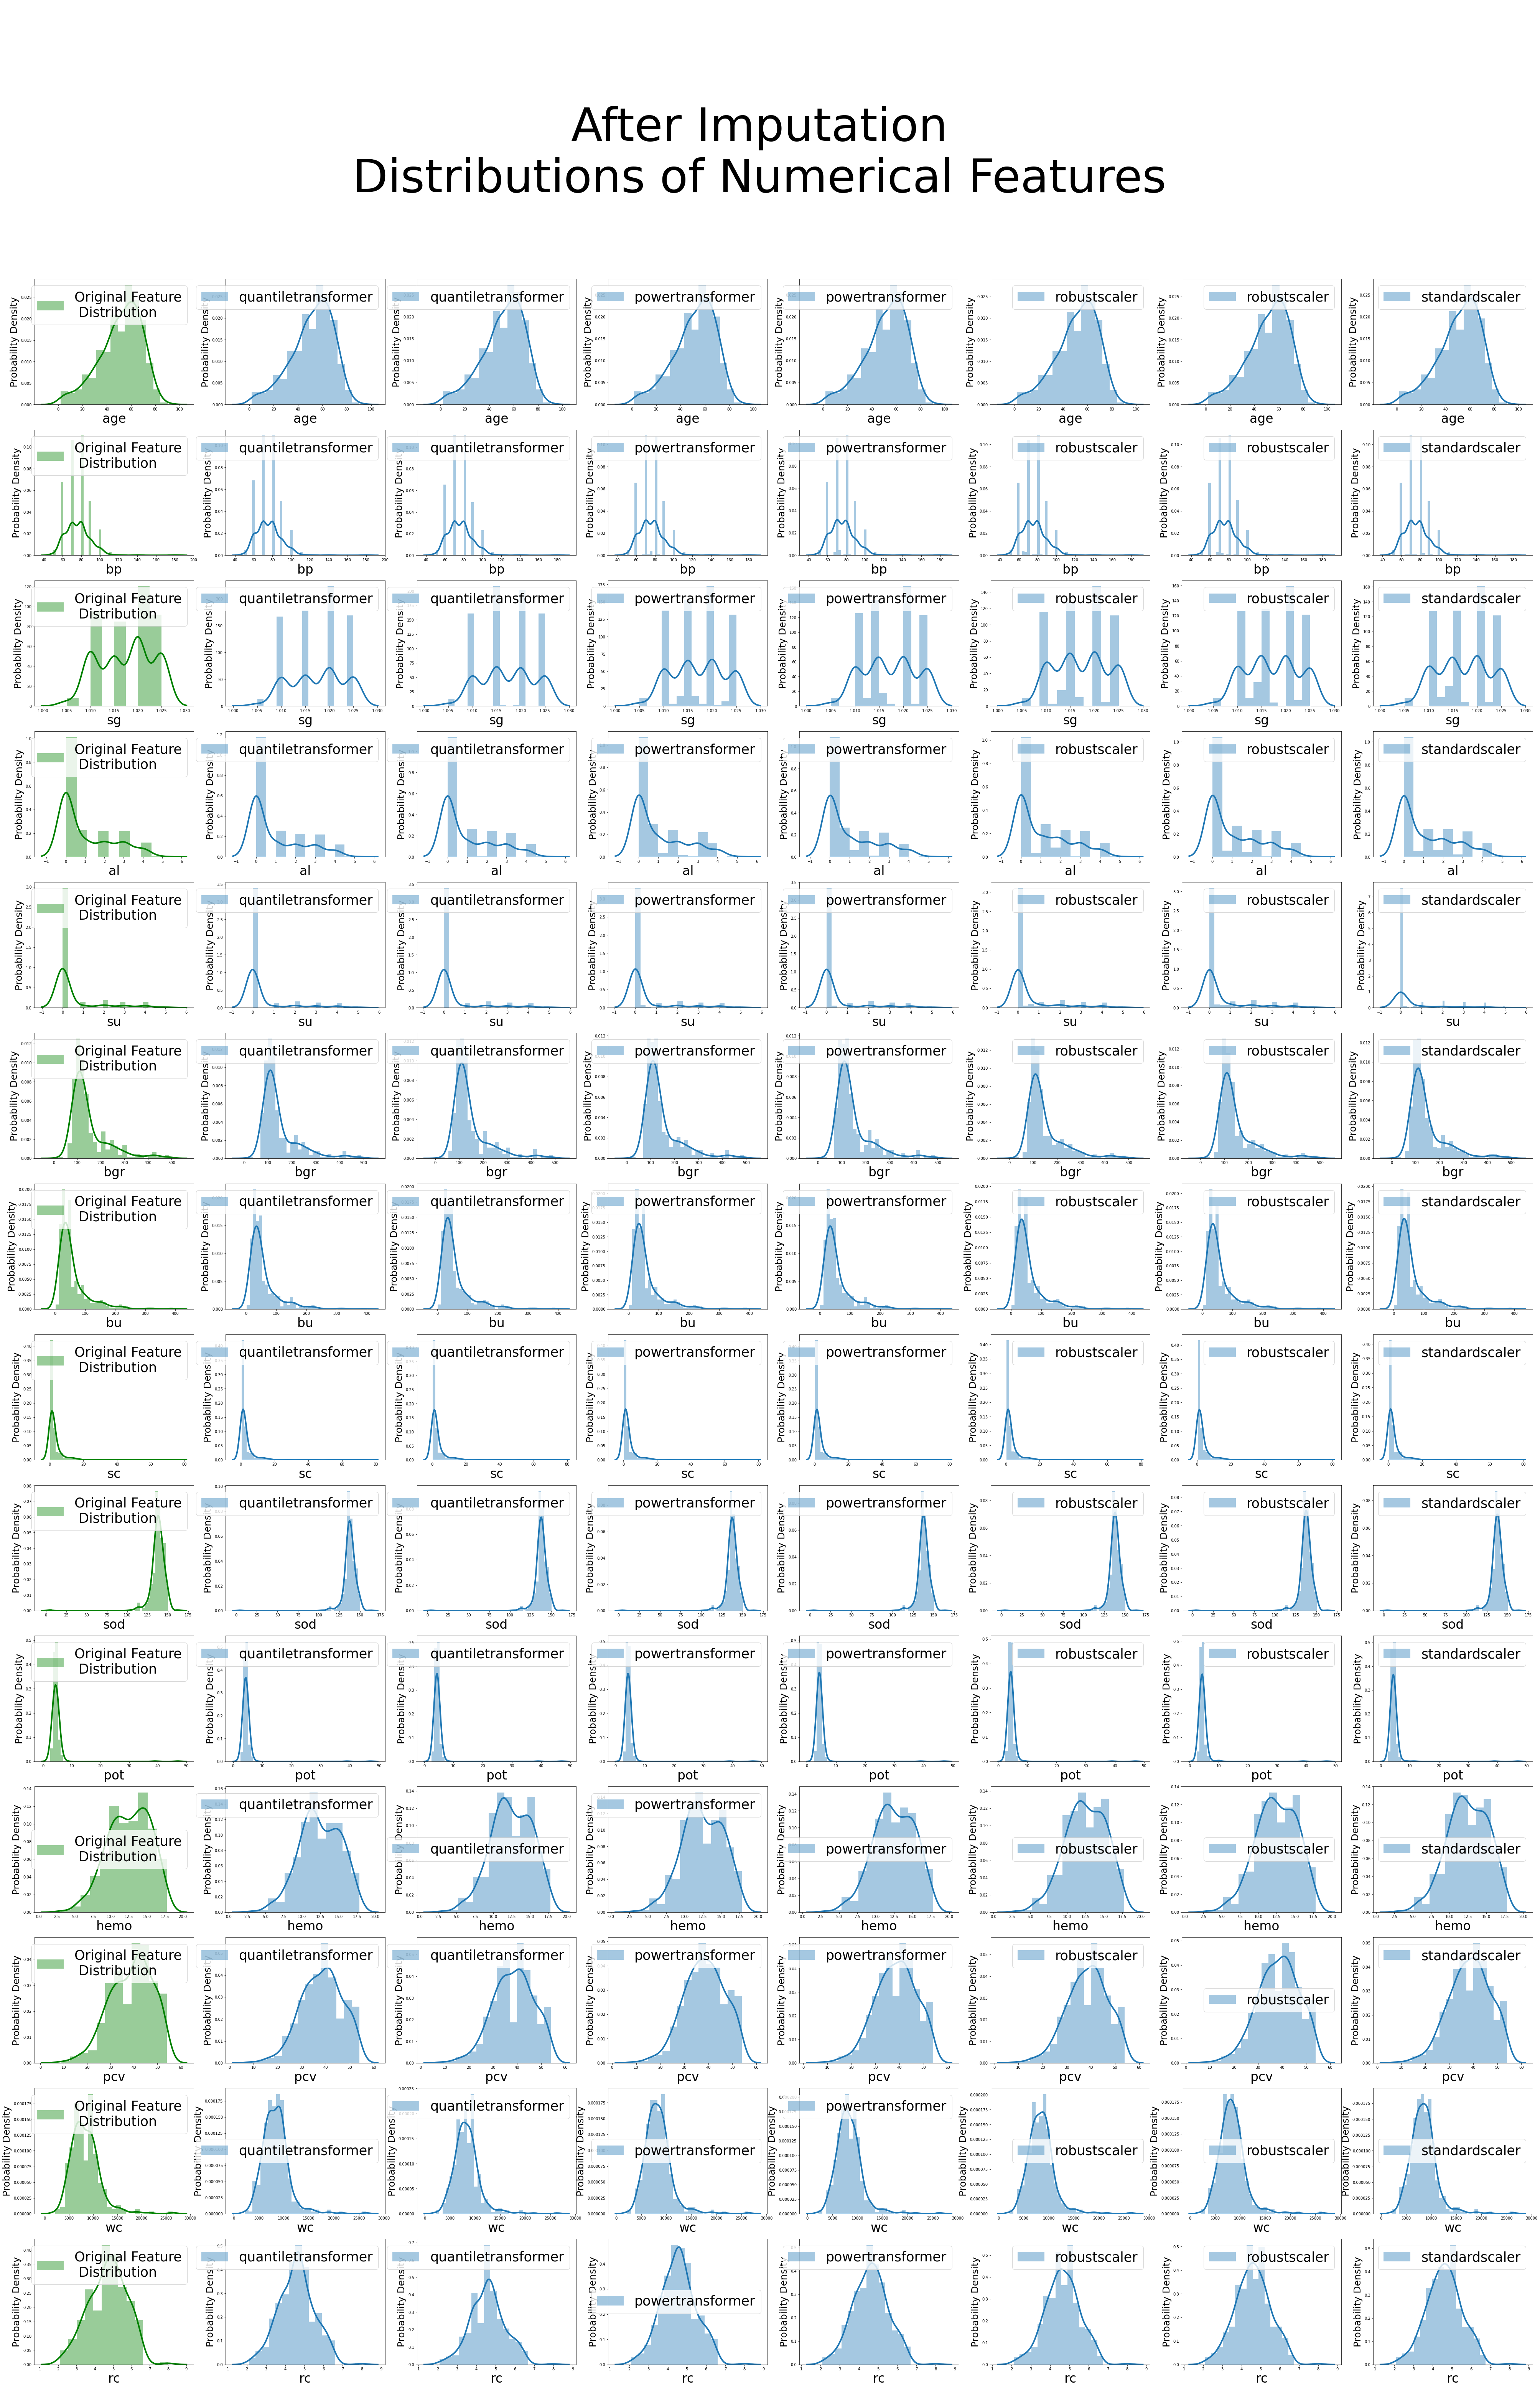

In [55]:
n_rows, n_cols = (14,8)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(70, 100))
figure.suptitle('\n\nAfter Imputation\nDistributions of Numerical Features', fontsize=120)
for i in range(14):
    fig = sns.distplot(encod_one.iloc[:,i], color="g", label='Original Feature\n Distribution', norm_hist=True,
    
    ax=axes[i,0], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=35)
    
    axes[i,0].set_xlabel(axes[i,0].get_xlabel(),fontsize=33)
    
    axes[i,0].set_ylabel("Probability Density",fontsize=25)

for j in range(1,8):
    for i in range(14):
        label=Pipes[j-1].steps[0][0]
        
        fig = sns.distplot(imp[j].iloc[:,i], label=label, norm_hist=True,

        ax=axes[i,j], kde_kws={"lw":4})
        
        fig=fig.legend(loc='best', fontsize=35)
    
        axes[i,j].set_ylabel("Probability Density",fontsize=25)
        
        axes[i,j].set_xlabel(axes[i,j].get_xlabel(),fontsize=33)

plt.show()

StandardScaler is the only one that kept the distribution of the red blood cells feature exactly as it is.

RobustScalers slightly increased the proportion of "0" while non-linear transformers decreased it, especially the uniform QuantileTransformer.

Setting 0.5 as a threshhold. Everything above 0.5 becomes 1, everything under 0.5 becomes 0.

In [56]:
test=imp.copy()
for j in range(1,8):
    dat=test[j]
    for i in range(14,25):
        col=dat.iloc[:,i]
        for k in range(400):
            if col[k]>=0.5:
                col[k]=1
            else:
                col[k]=0

In [57]:
imp=test

In [58]:
df.head()

age     bp    sg    al    su     rbc        pc         pcc          ba  \
0 48.000 80.000 1.020 1.000 0.000     NaN    normal  notpresent  notpresent   
1  7.000 50.000 1.020 4.000 0.000     NaN    normal  notpresent  notpresent   
2 62.000 80.000 1.010 2.000 3.000  normal    normal  notpresent  notpresent   
3 48.000 70.000 1.005 4.000 0.000  normal  abnormal     present  notpresent   
4 51.000 80.000 1.010 2.000 0.000  normal    normal  notpresent  notpresent   

      bgr     bu    sc     sod   pot   hemo    pcv       wc    rc  htn   dm  \
0 121.000 36.000 1.200     nan   nan 15.400 44.000 7800.000 5.200  yes  yes   
1     nan 18.000 0.800     nan   nan 11.300 38.000 6000.000   nan   no   no   
2 423.000 53.000 1.800     nan   nan  9.600 31.000 7500.000   nan   no  yes   
3 117.000 56.000 3.800 111.000 2.500 11.200 32.000 6700.000 3.900  yes   no   
4 106.000 26.000 1.400     nan   nan 11.600 35.000 7300.000 4.600   no   no   

  cad appet   pe  ane classification  
0  no  good   no   no            yes  
1  no  good   no   no            yes  
2  no  poor   no  yes            yes  
3  no  poor  yes  yes            yes  
4  no  good   no   no            yes

In [59]:
#Finding Features with many missing values
fwmmv=list(numerical_feats.copy())
the_other_ones=['age','bp','sc','bu']
for f in range(len(the_other_ones)):
    if the_other_ones[f] in fwmmv:
        fwmmv.remove(the_other_ones[f])
fwmmv.extend(('rbc: normal','pc: normal'))

In [60]:
fwmmv 

['sg',
 'al',
 'su',
 'bgr',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'rbc: normal',
 'pc: normal']

In [61]:
encod_one=imp[1].copy()

In [62]:
encod_one.dropna().shape

(400, 25)

In [63]:
X=encod_one.drop("classification: yes",axis=1,inplace=False)
Y=encod_one["classification: yes"]

In [64]:
full_scaled_data=SS.fit_transform(encod_one)
scaled_data=SS.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.4, random_state=12) # 60% training and 40% test

In [66]:
print(X_test.shape)
print(Y_test.shape)

(160, 24)
(160,)


**<h2>Modelling</h2>**

**<h3>Selecting model using TPOT</h3>**

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

TPOT will automatically explore hundreds of possible pipelines to find the best one for our dataset. Note, the outcome of this search will be a scikit-learn pipeline, meaning it will include any pre-processing steps as well as the model.

We are using TPOT to help us zero in on one model that we can then explore and optimize further.

In [67]:
pip install tpot

     |████████████████████████████████| 87 kB 4.5 MB/s 
     |████████████████████████████████| 160 kB 36.6 MB/s 
     |████████████████████████████████| 173.5 MB 12 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=062304cfbea8995ca2d0133f45ded2521b97df9ffbbd6c9c9a7ce13bc32603a1
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [68]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=7,
                     population_size=20,
                     verbosity=2,
                     scoring='roc_auc',
                     random_state=42,
                     disable_update_check=True,
                     config_dict='TPOT light')
tpot.fit(X_train, Y_train)

# AUC Score
auc_score = roc_auc_score(Y_test, tpot.predict_proba(X_test)[:, 1])
print("\nAUC SCORE: {:.4f}".format(auc_score))

# Best Pipeline steps
print("\nBEST PIPELINE STEPS:", end="\n")
for i, (y, z) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    print("{}. {}".format(i, z))

Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Generation 6 - Current best internal CV score: 1.0

Generation 7 - Current best internal CV score: 1.0

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=21, p=1, weights=distance)

AUC SCORE: 1.0000

BEST PIPELINE STEPS:
1. KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')


**Note:**
*However, the best accuracy is obtained through Hyper Parameter Tuning of Random Forest Classifier.*

**<h3>Linear Regression</h3>**

In [69]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

regr.fit(X_train, Y_train)
#print(regr.score(X_test, Y_test)*100)

Lin_Rscore = regr.score(X_test,Y_test)
Lin_Rscore

0.6255978206431212

**<h3>Logistic Regression</h3>**

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear',
                                          random_state=42)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print('-'*40)
print('Accuracy of Logistic Regression: {:.3f}'.format(accuracy_score(pred,Y_test)*100))
print('-'*40)

----------------------------------------
Accuracy of Logistic Regression: 96.875
----------------------------------------


In [71]:
LRscore = model.score(X_test,Y_test)
LRscore

0.96875

In [72]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred})
df

Actual  Predicted
280   0.000      0.000
387   0.000      0.000
313   0.000      0.000
1     1.000      1.000
35    1.000      1.000
210   1.000      1.000
39    1.000      1.000
52    1.000      1.000
320   0.000      0.000
231   1.000      1.000
90    1.000      1.000
159   1.000      1.000
21    1.000      1.000
207   1.000      1.000
250   0.000      0.000
364   0.000      0.000
214   1.000      1.000
339   0.000      0.000
200   1.000      1.000
131   1.000      1.000
234   1.000      1.000
363   0.000      0.000
315   0.000      0.000
111   1.000      1.000
238   1.000      1.000
383   0.000      0.000
342   0.000      0.000
86    1.000      1.000
272   0.000      0.000
195   1.000      1.000
37    1.000      1.000
6     1.000      1.000
144   1.000      1.000
359   0.000      0.000
379   0.000      0.000
370   0.000      0.000
0     1.000      1.000
396   0.000      0.000
344   0.000      0.000
128   1.000      1.000
12    1.000      1.000
224   1.000      0.000
346   0.000      0.000
14    1.000      1.000
152   1.000      1.000
191   1.000      1.000
226   1.000      1.000
81    1.000      1.000
135   1.000      1.000
343   0.000      0.000
279   0.000      0.000
296   0.000      0.000
206   1.000      1.000
285   0.000      0.000
252   0.000      0.000
385   0.000      0.000
127   1.000      1.000
334   0.000      0.000
268   0.000      0.000
122   1.000      1.000
50    1.000      1.000
382   0.000      0.000
306   0.000      0.000
205   1.000      1.000
140   1.000      1.000
399   0.000      0.000
42    1.000      1.000
85    1.000      1.000
230   1.000      1.000
69    1.000      0.000
290   0.000      0.000
209   1.000      0.000
294   0.000      0.000
201   1.000      1.000
87    1.000      1.000
149   1.000      1.000
301   0.000      0.000
78    1.000      1.000
71    1.000      1.000
186   1.000      1.000
199   1.000      1.000
43    1.000      1.000
307   0.000      0.000
166   1.000      1.000
64    1.000      1.000
356   0.000      0.000
137   1.000      1.000
236   1.000      1.000
297   0.000      0.000
317   0.000      0.000
125   1.000      1.000
124   1.000      1.000
264   0.000      0.000
314   0.000      0.000
167   1.000      1.000
139   1.000      1.000
180   1.000      1.000
41    1.000      1.000
303   0.000      0.000
16    1.000      1.000
92    1.000      1.000
328   0.000      0.000
67    1.000      1.000
254   0.000      0.000
360   0.000      0.000
308   0.000      0.000
305   0.000      0.000
277   0.000      0.000
229   1.000      1.000
386   0.000      0.000
101   1.000      1.000
29    1.000      1.000
322   0.000      0.000
288   0.000      0.000
48    1.000      1.000
284   0.000      0.000
266   0.000      0.000
190   1.000      1.000
176   1.000      1.000
75    1.000      1.000
7     1.000      1.000
106   1.000      1.000
251   0.000      0.000
44    1.000      1.000
273   0.000      0.000
281   0.000      0.000
340   0.000      0.000
11    1.000      1.000
193   1.000      1.000
150   1.000      0.000
126   1.000      1.000
168   1.000      1.000
3     1.000      1.000
397   0.000      0.000
292   0.000      0.000
258   0.000      0.000
247   1.000      1.000
371   0.000      0.000
265   0.000      0.000
255   0.000      0.000
220   1.000      1.000
348   0.000      0.000
51    1.000      1.000
80    1.000      1.000
99    1.000      1.000
18    1.000      1.000
388   0.000      0.000
329   0.000      0.000
275   0.000      0.000
316   0.000      0.000
83    1.000      1.000
34    1.000      1.000
31    1.000      1.000
61    1.000      0.000
23    1.000      1.000
338   0.000      0.000
47    1.000      1.000
77    1.000      1.000
202   1.000      1.000
368   0.000      0.000

Cross Validation is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cross_val = cross_val_score(model,X,Y,cv=5,scoring='accuracy')
print('-'*40)
print('Cross Validation Score of Logistic Regression: {:.3f}'.format(cross_val.mean()*100))
print('-'*40)

----------------------------------------
Cross Validation Score of Logistic Regression: 97.500
----------------------------------------


The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes

In [74]:
# AUC Score
from sklearn.metrics import roc_auc_score

log_reg_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
print("\nAUC SCORE: {:.4f}".format(log_reg_auc))


AUC SCORE: 1.0000


**<h3>Random Forest</h3>**

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, Y_train)
y_pred = forest_model.predict(X_test)

In [76]:
forest_model.score(X_test, Y_test)

0.9801046380998235

In [77]:
print(forest_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


GridSearchCV is a library function that is a member of sklearn's model_selection package. 

It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 

So, in the end, you can select the best parameters from the listed hyperparameters.

In [78]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    "n_estimators" : [100],
    "criterion" : ["mse"],
    "max_depth" : [None],
    "min_samples_leaf" : [1],
    "max_features" : ["auto"]
}

In [79]:
grid_search = GridSearchCV(estimator=forest_model,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [80]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_depth': [None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'n_estimators': [100]},
             verbose=3)

In [81]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [82]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= "gini",
                                  max_depth= None,
                                  max_features= 'auto',
                                  min_samples_leaf= 1,
                                  n_estimators= 100, random_state=6)

In [83]:
rand_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=6)

In [84]:
RFCscore = rand_clf.score(X_test,Y_test)
RFCscore

1.0

In [85]:
acc = rand_clf.score(X_test, Y_test)
print('Accuracy of Random Forest: {:.3f}'.format(acc*100))

Accuracy of Random Forest: 100.000


**<h3>SVM</h3>**

In [86]:
from sklearn import svm

reg1 = svm.SVC(kernel='linear')
reg1.fit(X_train, Y_train)
pred1 = reg1.predict(X_test)
SVMscore = reg1.score(X_test,Y_test)
SVMscore

0.99375

In [87]:
print('-'*40)
print('Accuracy of SVM: {:.3f}'.format(accuracy_score(pred1,Y_test)*100))
print('-'*40)

----------------------------------------
Accuracy of SVM: 99.375
----------------------------------------


**<h3>Naive Bayes</h3>**

In [88]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Creating a Gaussian Classifier
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)
NBscore = gnb.score(X_test,Y_test)
NBscore

0.975

In [89]:
print("Accuracy:",accuracy_score(Y_test, y_pred)*100)

Accuracy: 97.5


**<h3>XG Boost</h3>**

In [90]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0) 

# Fit the model
my_model_1.fit(X_train, Y_train)

predictions_1 = my_model_1.predict(X_test)

In [91]:
XGBscore = my_model_1.score(X_test, Y_test)*100
XGBscore

97.41686194343171

**<h3>KNN</h3>**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

In [93]:
max_train_score = max(train_accuracy)
train_scores_ind = [i for i, v in enumerate(train_accuracy) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1, 3]


In [94]:
max_test_score = max(test_accuracy)
test_scores_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 98.75 % and k = [3, 4, 5]


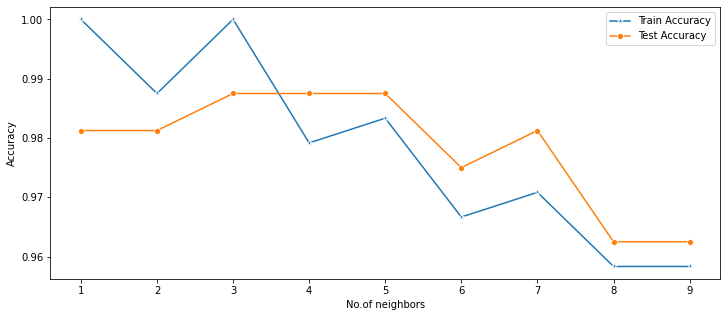

In [95]:
# KNN for different no.of neighbors
plt.figure(figsize=(12,5))
plt.xlabel('No.of neighbors')
plt.ylabel('Accuracy')
p = sns.lineplot(range(1,10),train_accuracy,marker='*',label='Train Accuracy')
p = sns.lineplot(range(1,10),test_accuracy,marker='o',label='Test Accuracy')

In [96]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
KNNscore = knn.score(X_test, Y_test)*100
KNNscore

98.75

**Confusion Matrix**

A confusion matrix is a table that shows how well a classification model (or "classifier") performs on a set of test data for which the true values are known.

In [98]:
conf_pred = knn.predict(X_test)

In [99]:
pd.crosstab(Y_test, conf_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  0.0  1.0  All
True                    
0.0         67    0   67
1.0          2   91   93
All         69   91  160

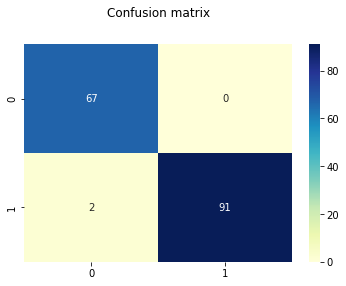

In [100]:
from sklearn import metrics

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
cnf_matrix = metrics.confusion_matrix(Y_test, conf_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

Precision – Accuracy of positive predictions.
  
    Precision = TP/(TP + FP)

Recall(True Positive Rate): Fraction of positives that were correctly identified.

    Recall = TP/(TP+FN)
  
F1 Score takes into account precision and the recall.It is created by finding the the harmonic mean of precision and recall.

    F1 = 2 x (precision x recall)/(precision + recall)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,conf_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        67
         1.0       1.00      0.98      0.99        93

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



**ROC curve**

It's a graph that shows the real positive rate versus the false positive rate for various diagnostic test cutpoints.

In [103]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [104]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [105]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),

    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(kernel='linear'),
 
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    
    ]

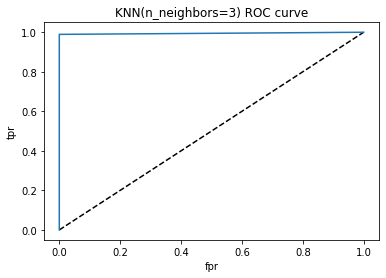

In [106]:
pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN(n_neighbors=3) ROC curve')
plt.show()

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,pred_proba)

0.9946236559139785

In [108]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, Y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, Y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(Y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

MLA Name  MLA Train Accuracy  MLA Test Accuracy  \
0  RandomForestClassifier               1.000              1.000   
1    LogisticRegressionCV               0.996              0.994   
6                     SVC               1.000              0.994   
7  DecisionTreeClassifier               1.000              0.994   
5    KNeighborsClassifier               0.983              0.988   
2              Perceptron               1.000              0.975   
3             BernoulliNB               0.971              0.975   
4              GaussianNB               0.958              0.975   

   MLA Precission  MLA Recall  MLA AUC  
0           1.000       1.000    1.000  
1           1.000       0.989    0.995  
6           1.000       0.989    0.995  
7           1.000       0.989    0.995  
5           1.000       0.978    0.989  
2           1.000       0.957    0.978  
3           1.000       0.957    0.978  
4           1.000       0.957    0.978

In [109]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,Y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(X_test,Y_test))
DTCscore = DTC.score(X_test,Y_test)

Decision Tree Score:  0.99375


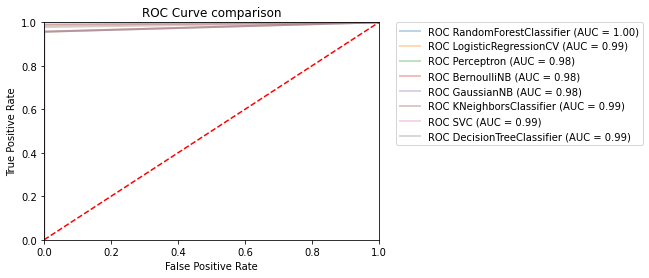

In [110]:
index = 1
for alg in MLA:
    predicted = alg.fit(X_train, Y_train).predict(X_test)
    fp, tp, th = roc_curve(Y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()


In [111]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [112]:
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot

import plotly.graph_objs as go
from plotly.offline import iplot

In [113]:
scores=[Lin_Rscore, LRscore, SVMscore,NBscore, DTCscore, RFCscore]
AlgorithmsName=["Linear Regression",  "Logistic Regression", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]

trace1 = go.Scatter(
    x = AlgorithmsName,
    y= scores,
    name='Algorithms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorithmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

**<h2>Deployment</h2>**

In [114]:
import pickle

In [115]:
pickle.dump(rand_clf, open('chronic.pkl', 'wb'))

In [116]:
with open('chronic.pkl', 'rb') as f:
    auc_score = roc_auc_score(Y_test, rand_clf.predict_proba(X_test)[:, 1])
    print("\nAUC SCORE: {:.3f}".format(auc_score))


AUC SCORE: 1.000
